In [1]:
import torch
from utils import DataLoader, evaluate_model
from models import FFNNModel
from matplotlib import pyplot as plt

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
dl = DataLoader(
    benchmark="benchmark_2",
    split=None,
    embedding="bert_cls", 
    max_len=128,
    include_axes=True,
    shuffle_axes=False,  
    normalization="zscore"
)

INFO:utils.dataloader:Initializing DataLoader...
INFO:utils.dataloader:Using device: cuda
INFO:utils.dataloader:Loading dataset for benchmark benchmark_2 with split None
INFO:utils.dataloader:No split specified; loading all splits (train, validation, test).
INFO:utils.dataloader:Dataset loaded successfully.
INFO:utils.dataloader:Initializing embedding for method bert_cls...
INFO:utils.dataloader:Initialized BERT model and tokenizer.
INFO:utils.dataloader:Embedding resources initialized.


In [4]:
data = dl.preprocess()
X_train, y_train = data["train"]
X_valid, y_valid = data["validation"]
X_test, y_test = data["test"]

INFO:utils.dataloader:Starting preprocessing of dataset(s)...
INFO:utils.dataloader:Processing split: train with 365 samples...
INFO:utils.dataloader:Processing a single dataset split...
INFO:utils.dataloader:Computing embeddings for 365 parent texts...
INFO:utils.dataloader:Computing axes embeddings...
INFO:utils.dataloader:Combined feature vector shape: torch.Size([365, 6912])
INFO:utils.dataloader:Extracting and normalizing target values...
INFO:utils.dataloader:Normalizing target values...
INFO:utils.dataloader:Z-score parameters: mean=[4.64040685e+01 9.55949315e+00 1.10821918e-02], std=[13.53428538  2.54048638  1.18524837]
INFO:utils.dataloader:Processing split: validation with 104 samples...
INFO:utils.dataloader:Processing a single dataset split...
INFO:utils.dataloader:Computing embeddings for 104 parent texts...
INFO:utils.dataloader:Computing axes embeddings...
INFO:utils.dataloader:Combined feature vector shape: torch.Size([104, 6912])
INFO:utils.dataloader:Extracting and no

In [5]:
input_dim = X_train.shape[1]
save_path = "baseline_weights/benchmark_2/ffnn.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


In [6]:
grid_params = {
    "hidden_dim": [64, 128, 256],
    "dropout": [0.0, 0.2, 0.5],
    "weight_decay": [0.0, 0.001, 0.01],
    "lr": [0.01, 0.001, 0.0001],
    "l1": [0.0, 0.0001, 0.001]
}
epochs = 100

INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0


INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9517


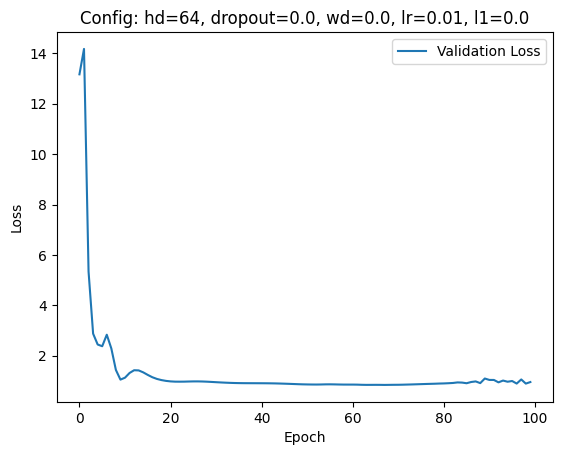

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9822


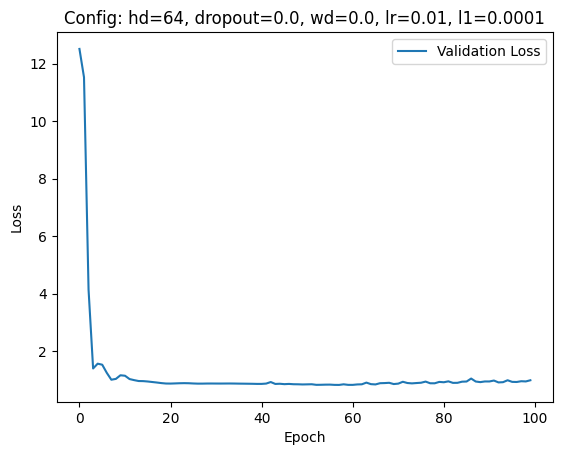

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8252


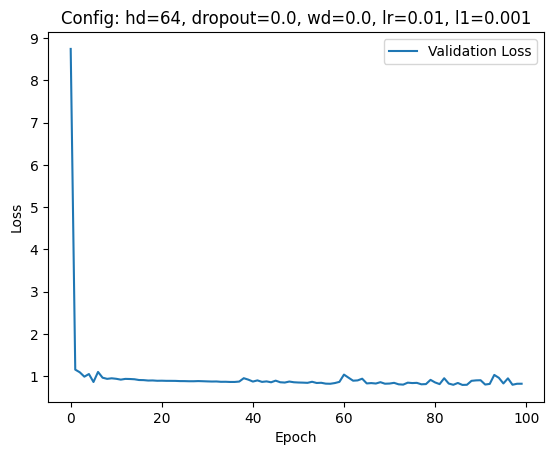

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0931


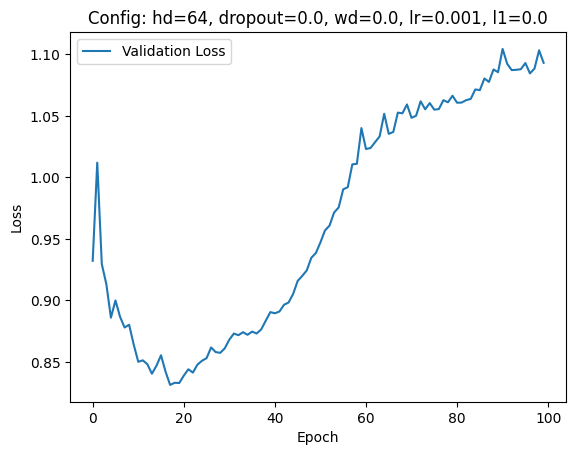

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0065


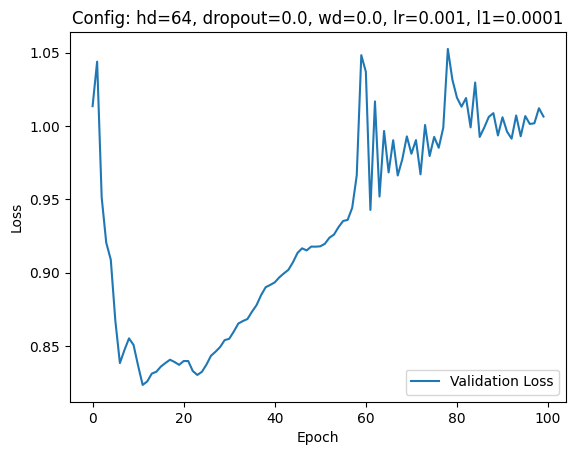

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8597


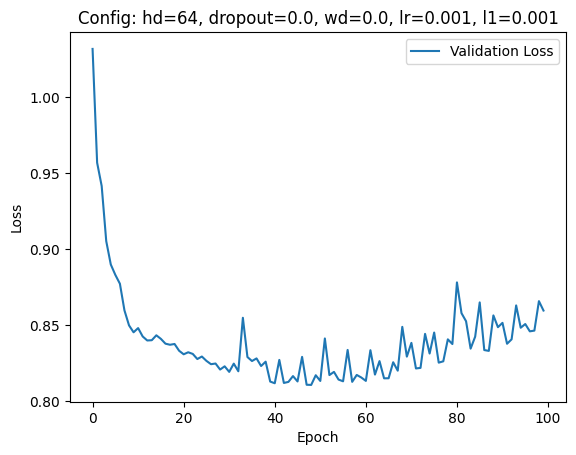

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9130


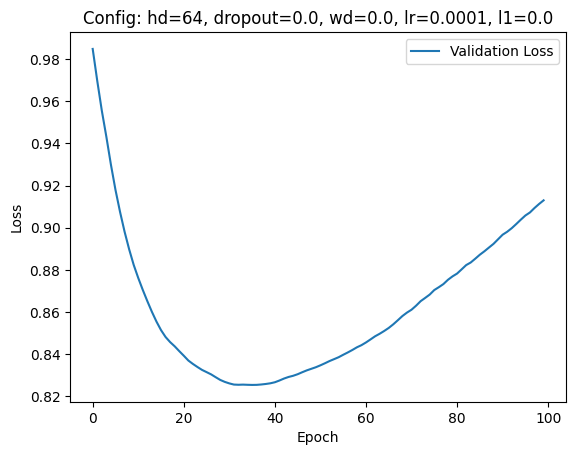

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9132


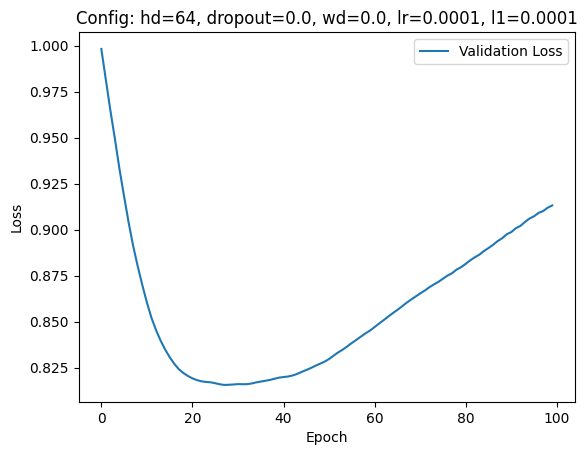

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8181


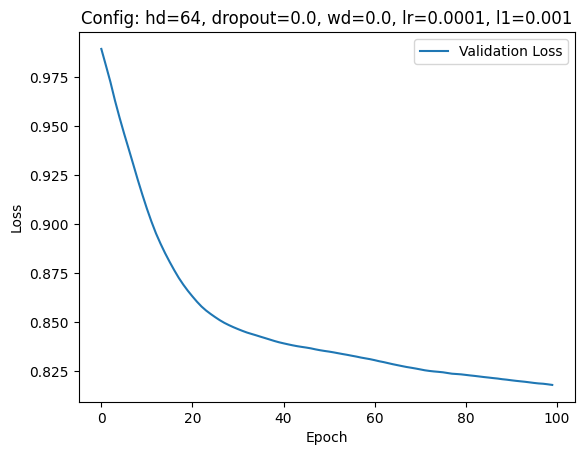

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.1641


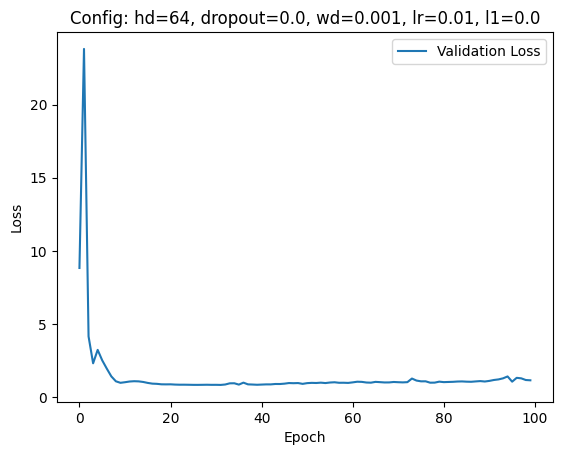

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9036


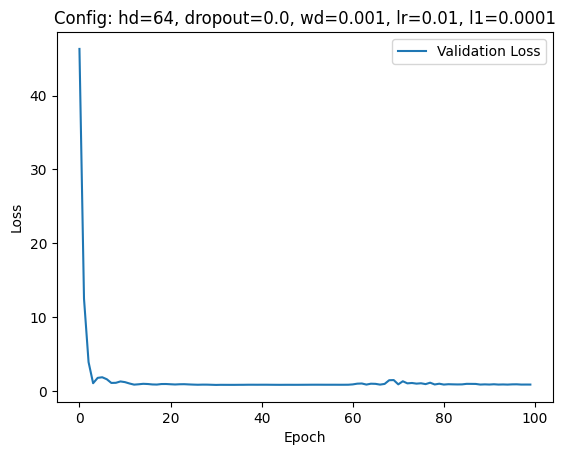

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8390


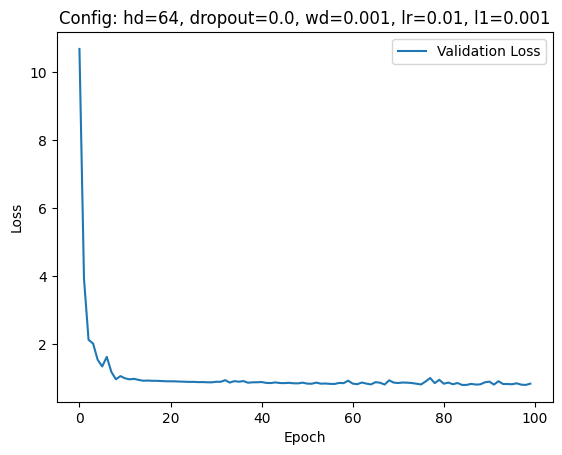

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0921


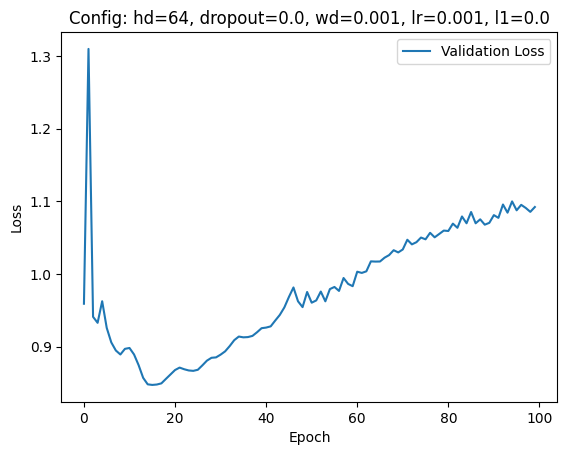

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0290


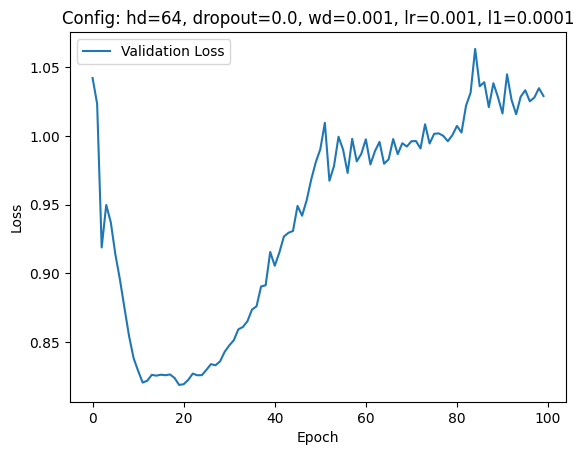

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9131


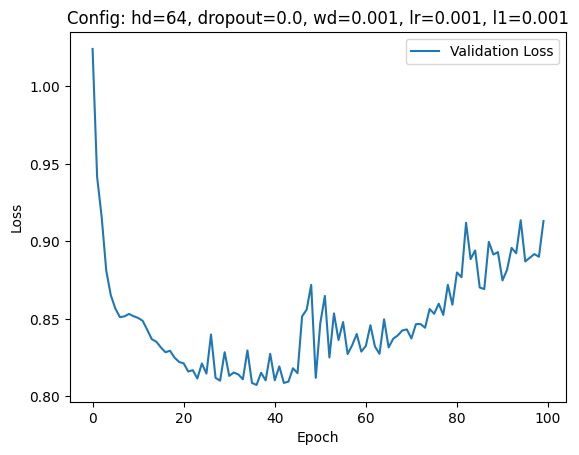

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8835


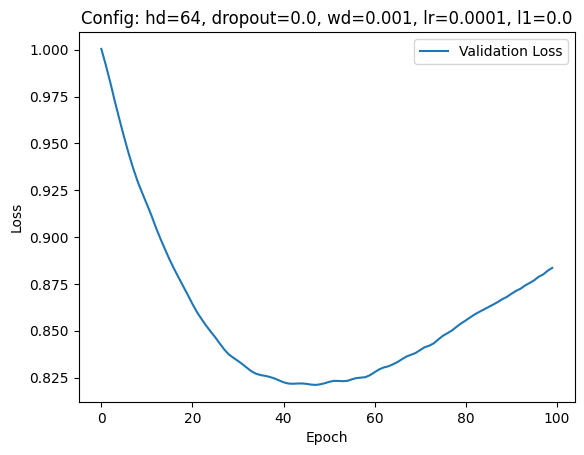

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8867


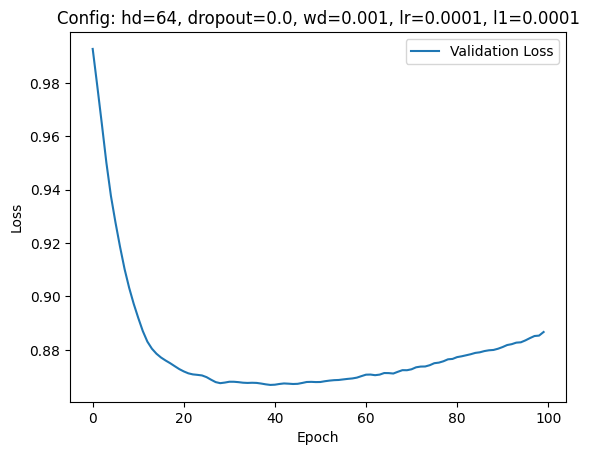

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8271


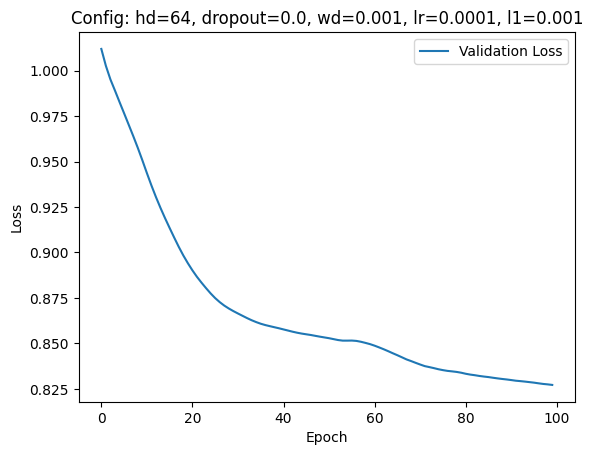

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8394


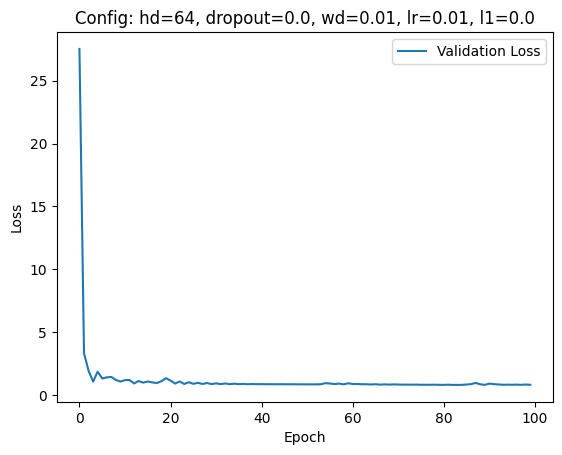

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9111


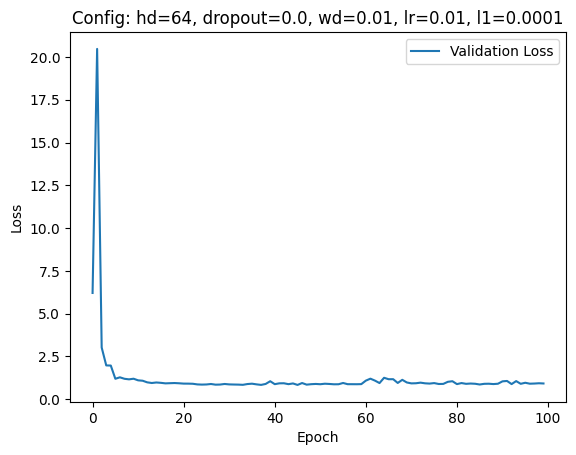

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9157


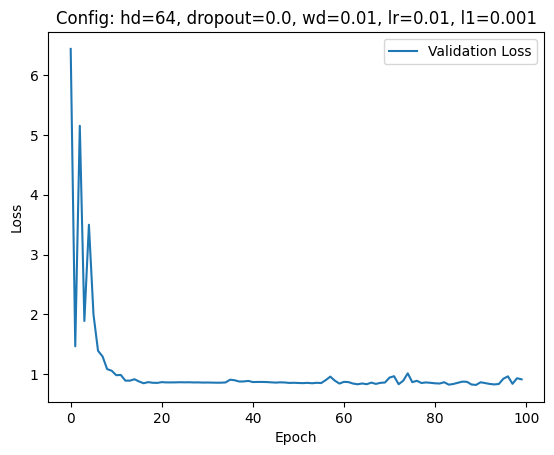

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0150


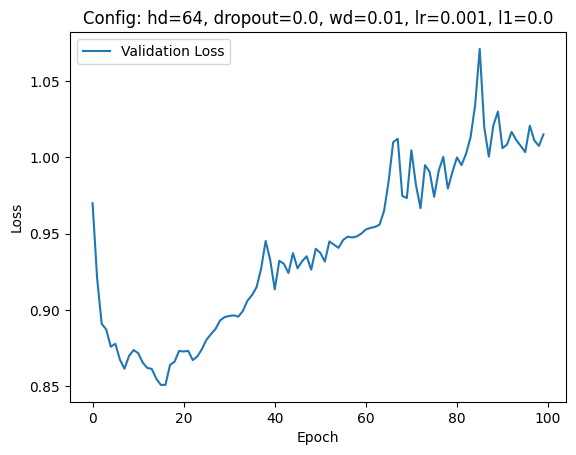

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9855


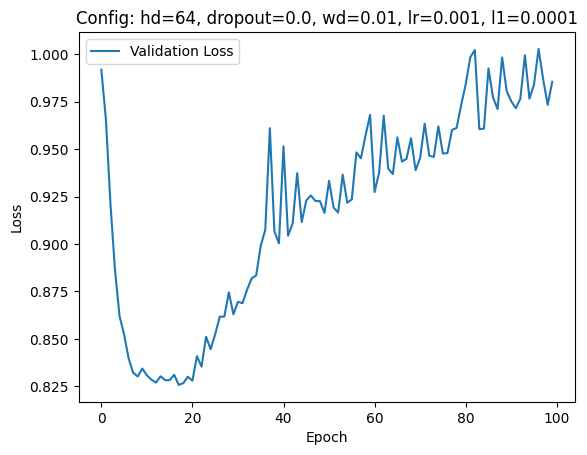

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8765


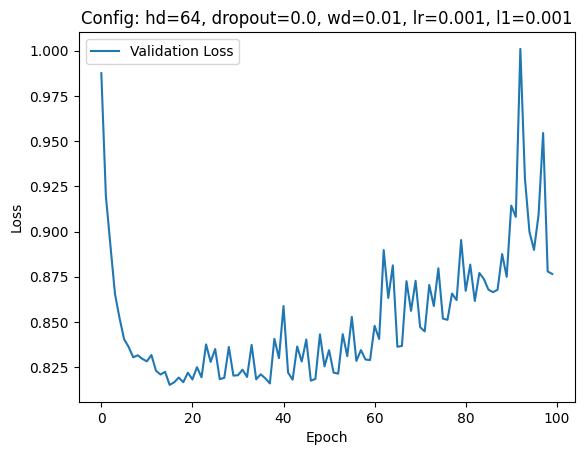

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9118


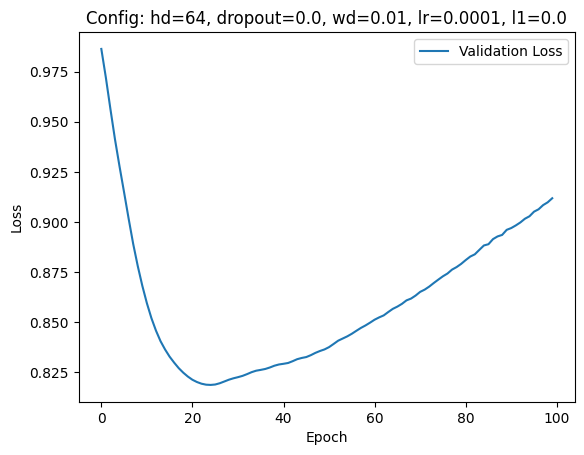

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8577


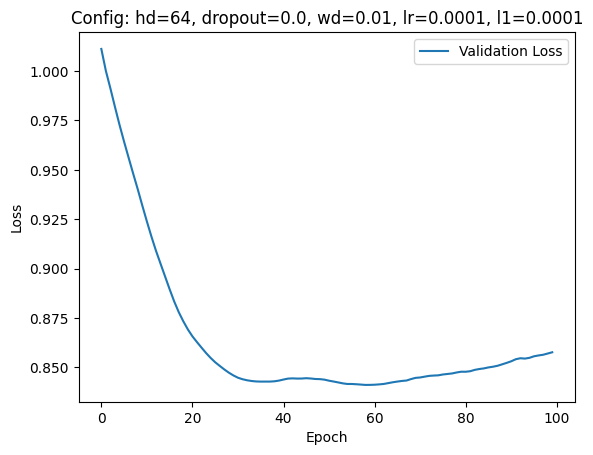

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8233


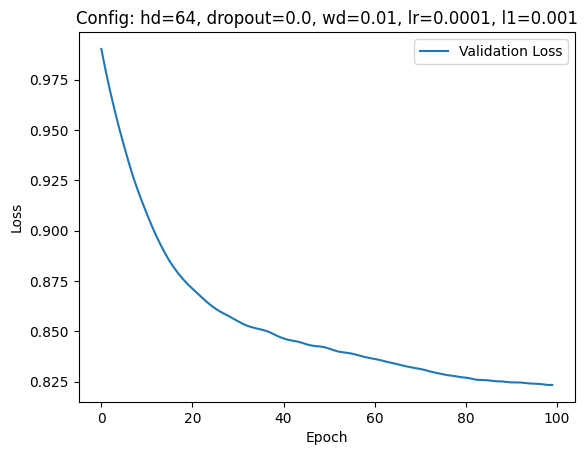

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9515


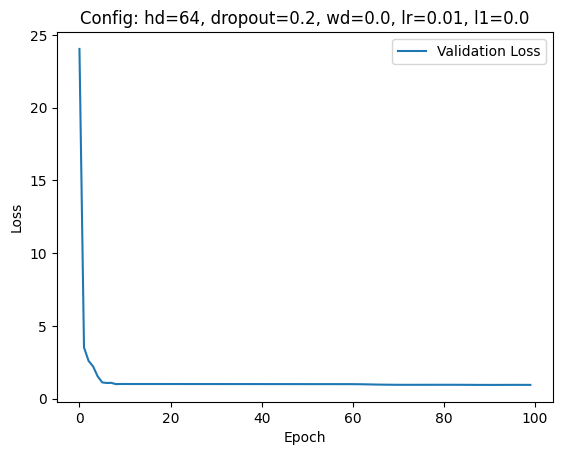

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9003


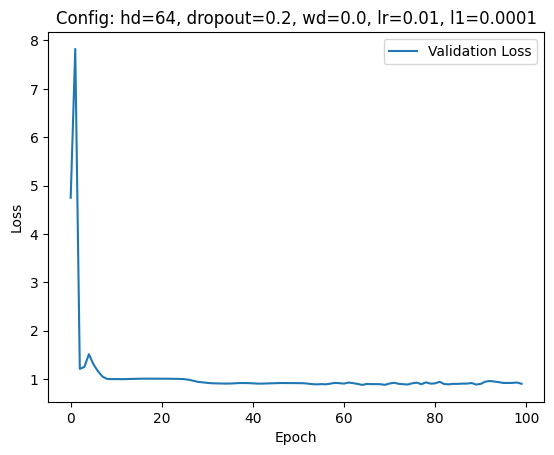

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8991


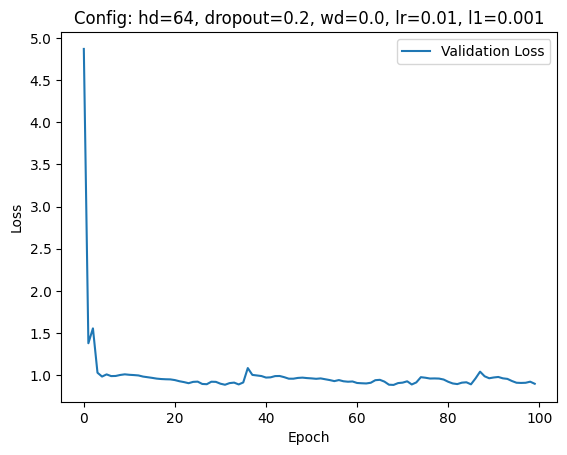

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9756


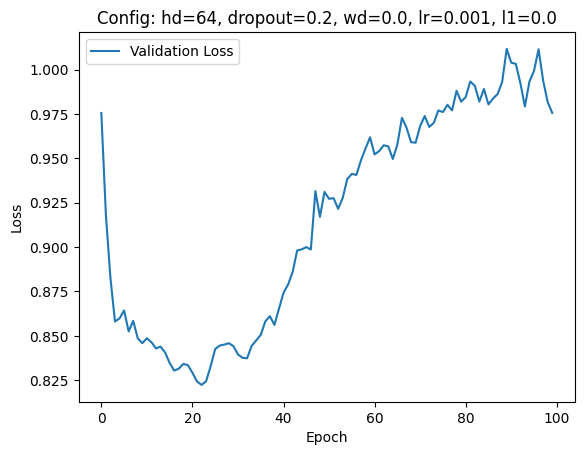

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9836


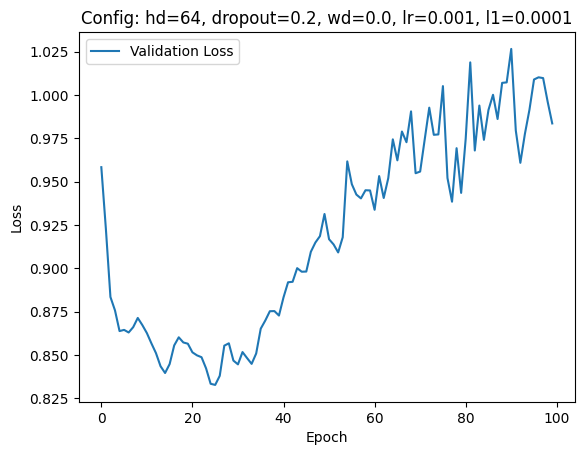

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8187


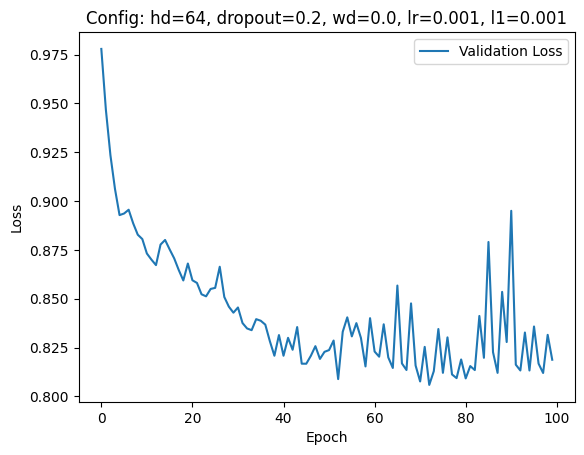

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8587


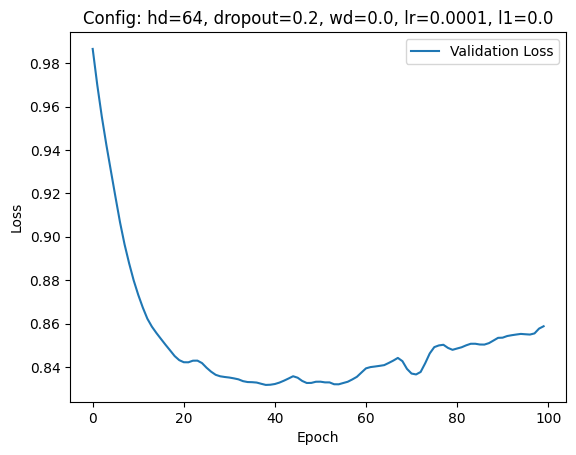

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8473


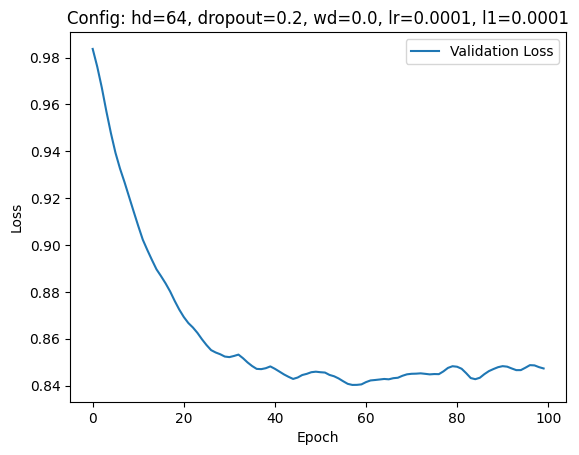

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8487


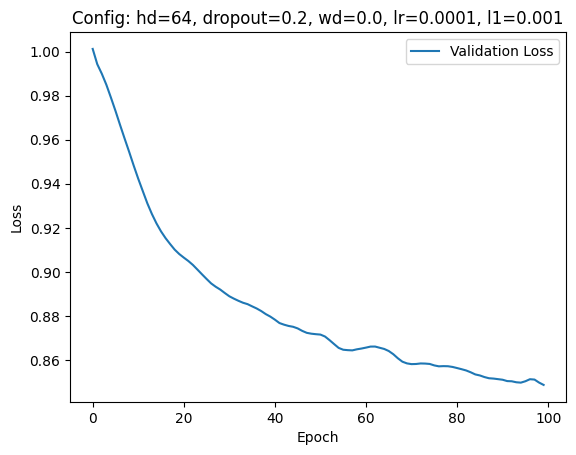

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9117


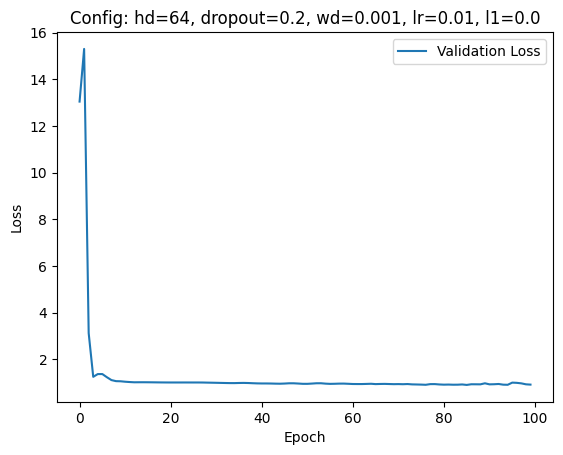

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0077


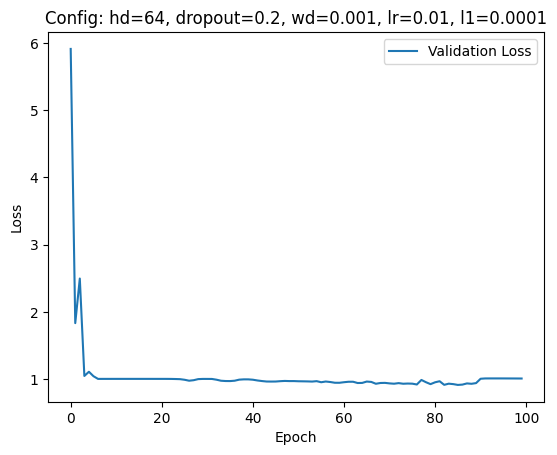

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9194


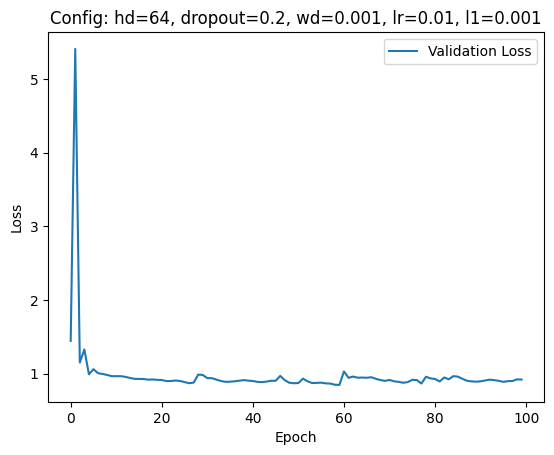

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0088


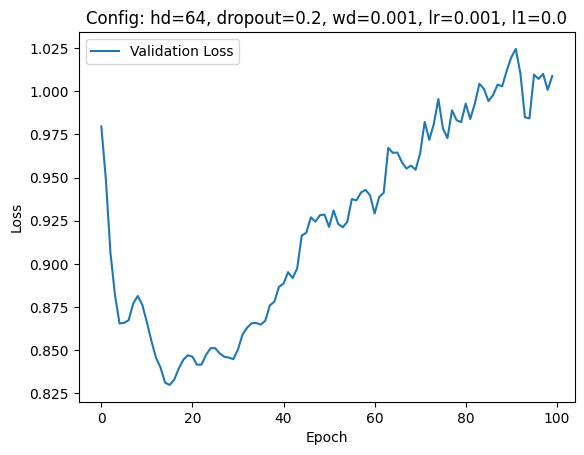

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9885


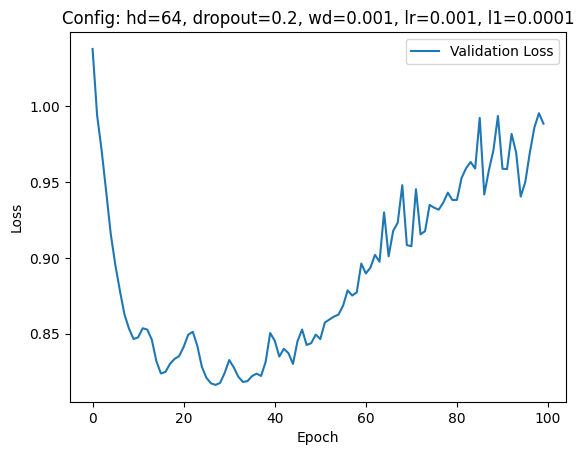

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8169


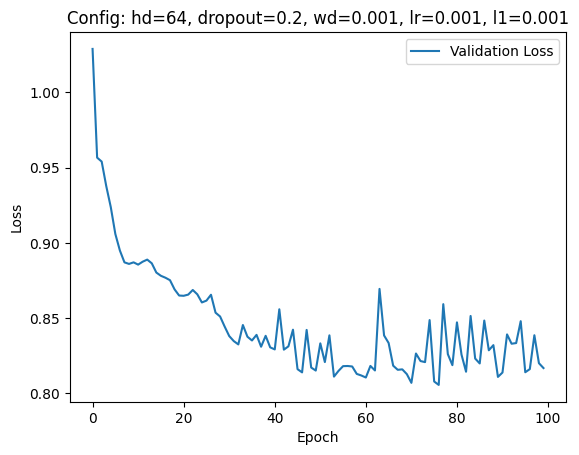

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8613


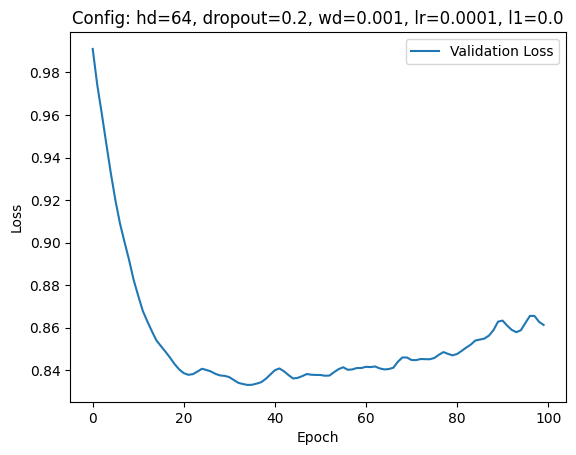

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8498


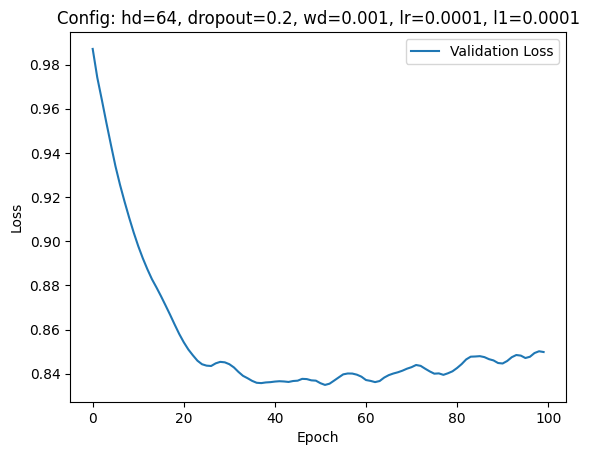

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8377


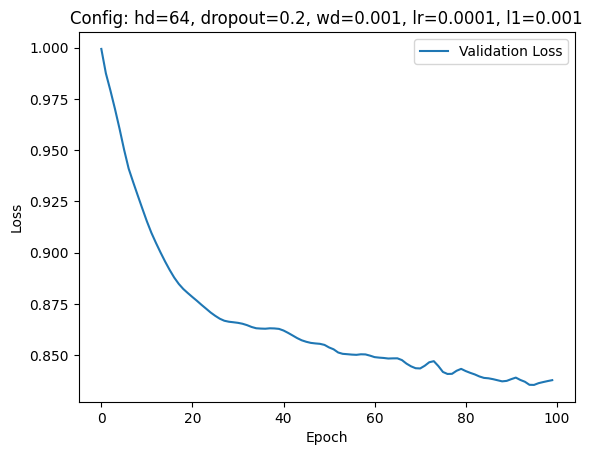

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9335


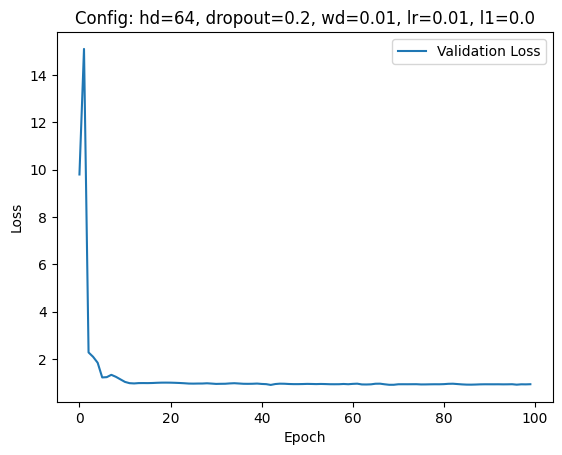

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8520


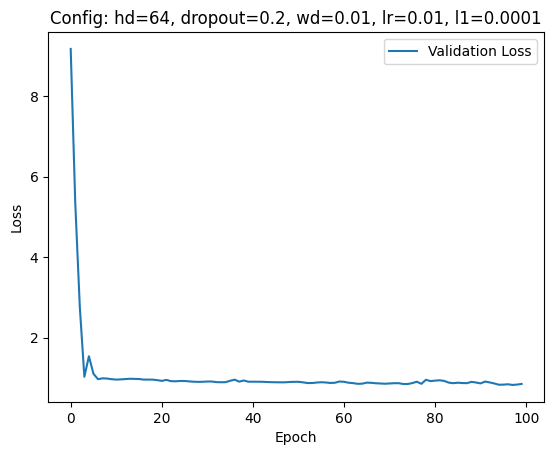

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9048


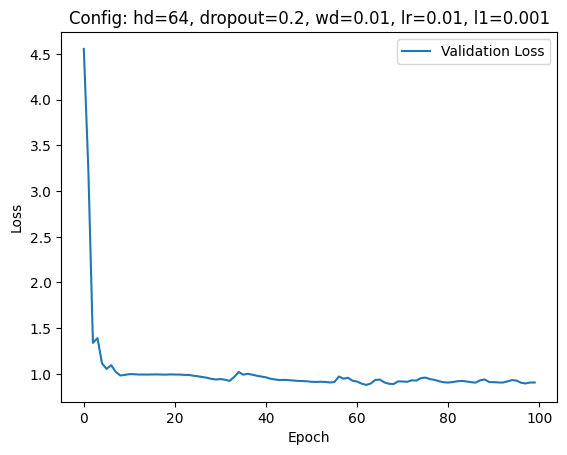

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9586


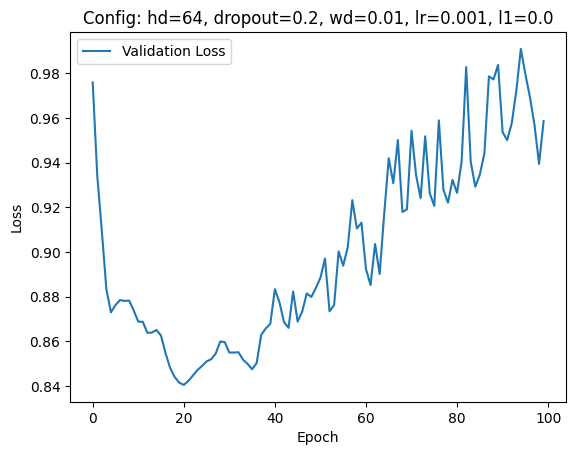

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9285


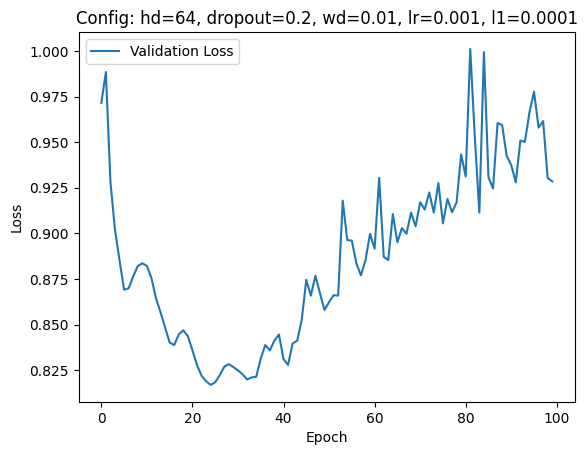

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8098


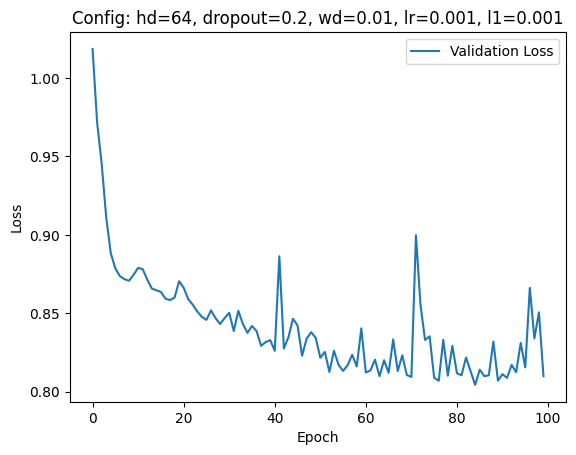

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8559


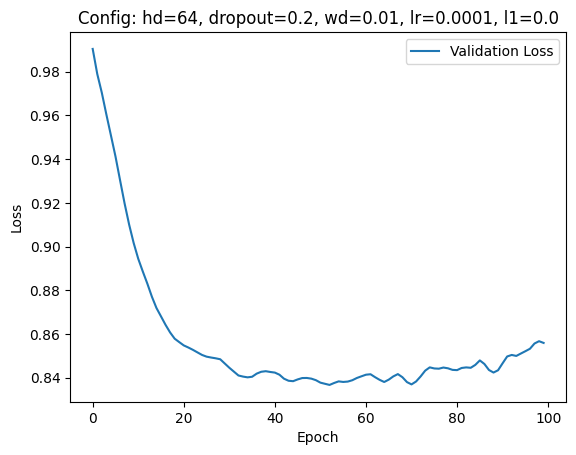

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8581


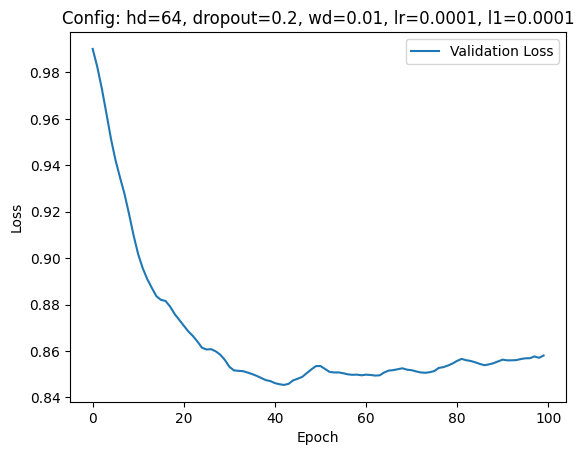

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8433


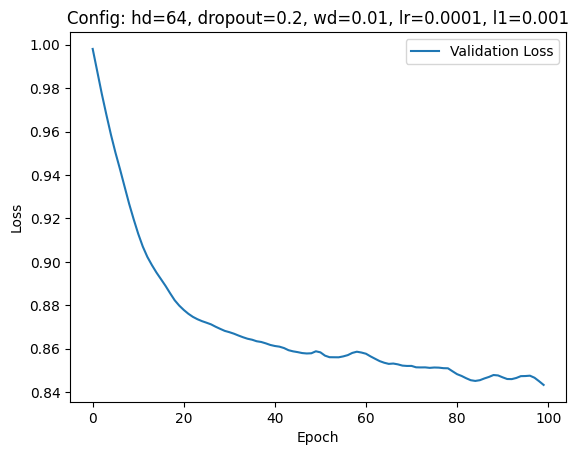

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0000


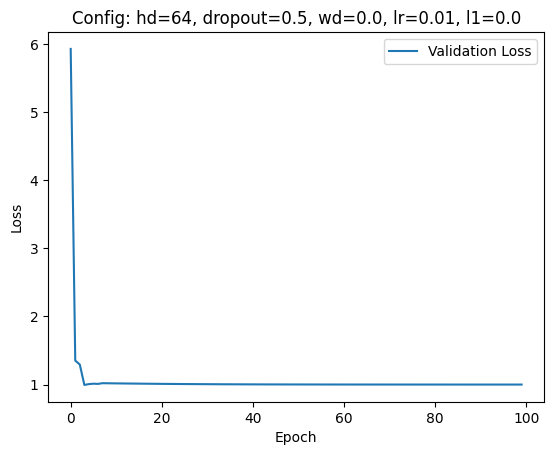

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0002


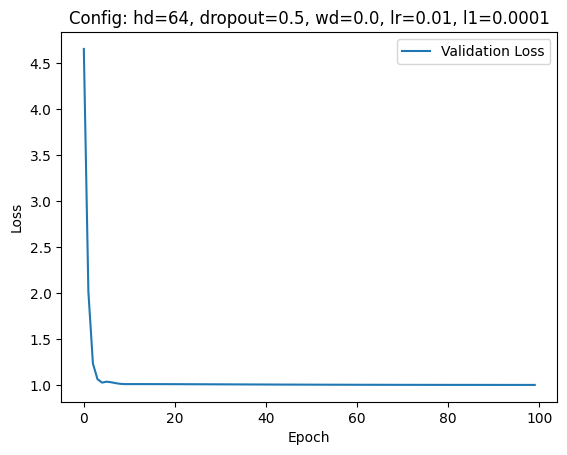

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9107


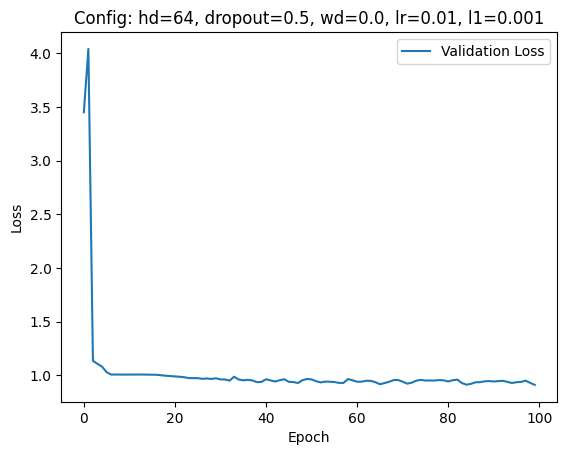

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9044


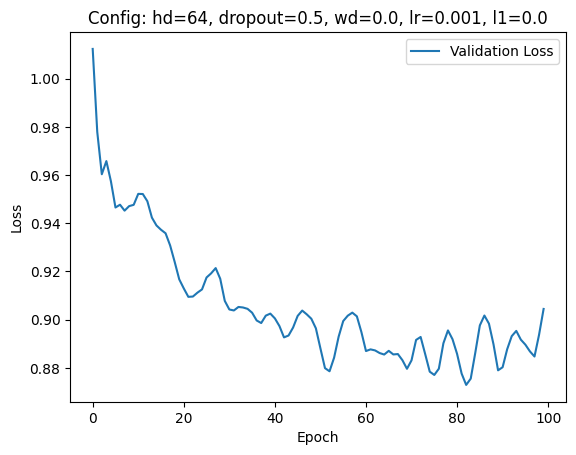

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8606


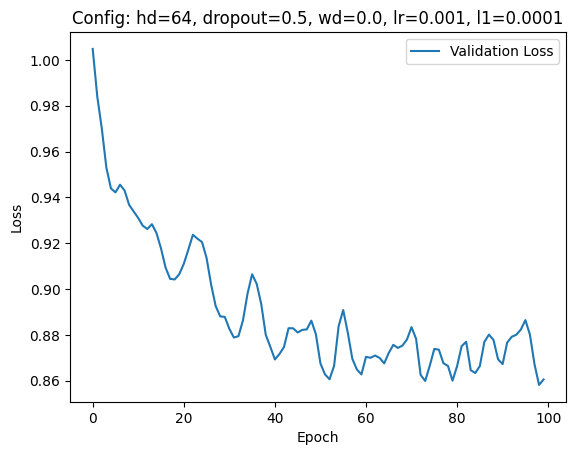

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8682


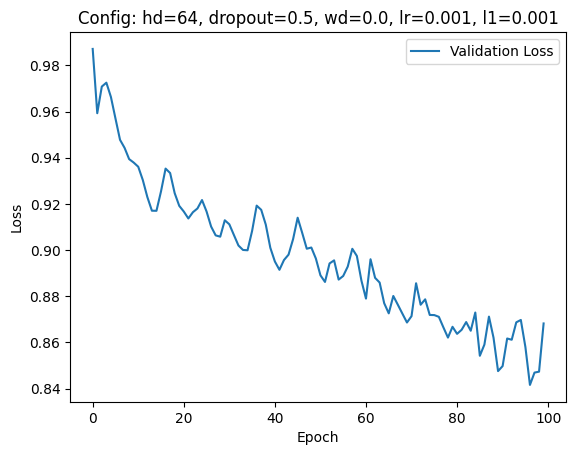

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8625


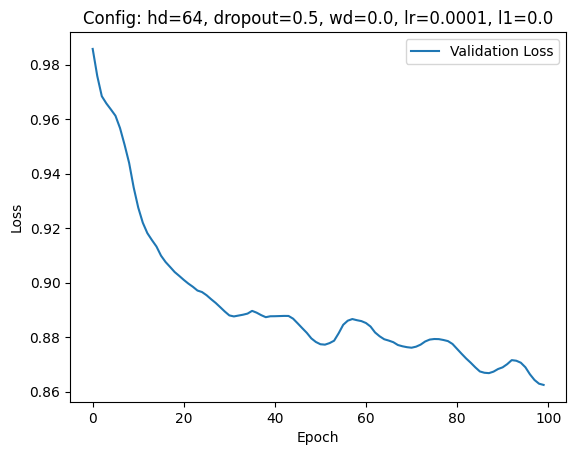

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8727


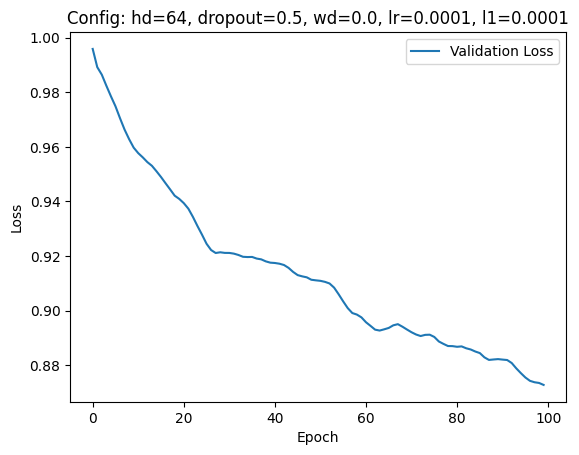

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8943


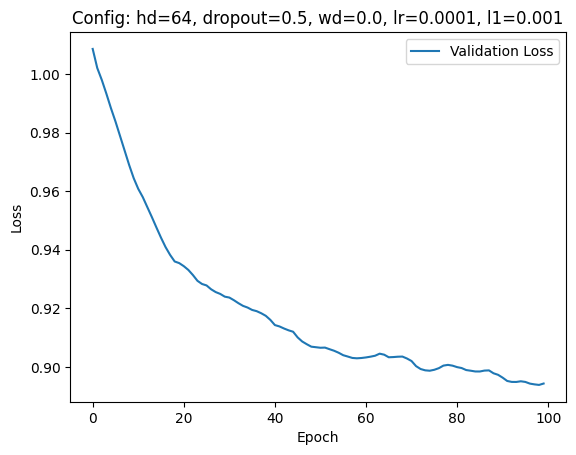

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9226


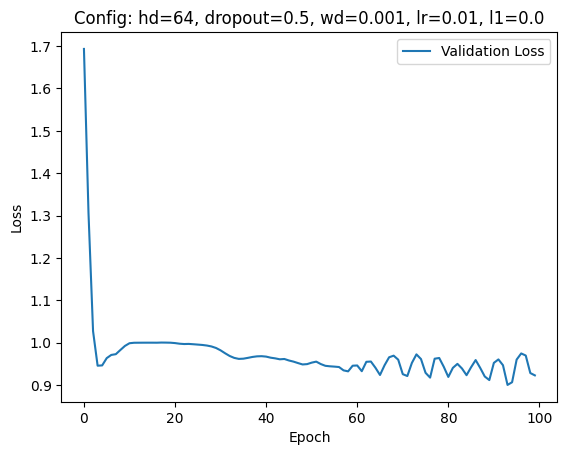

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9237


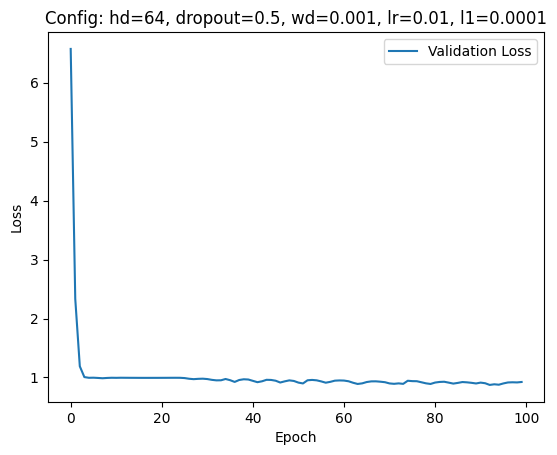

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9516


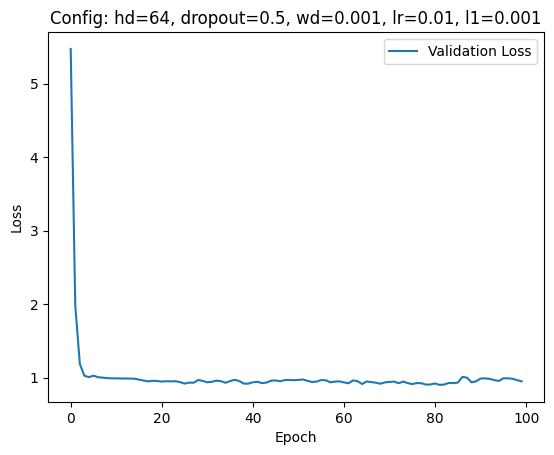

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8848


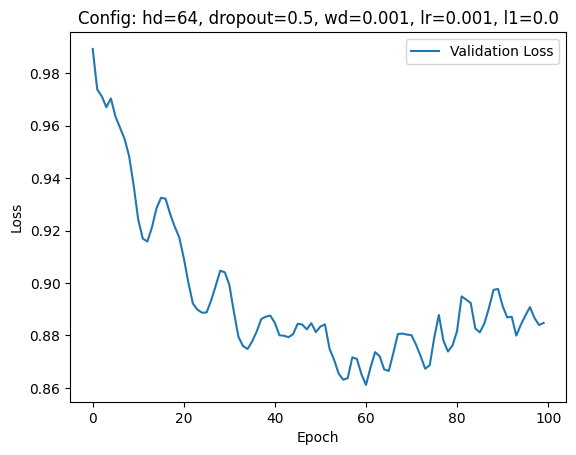

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8764


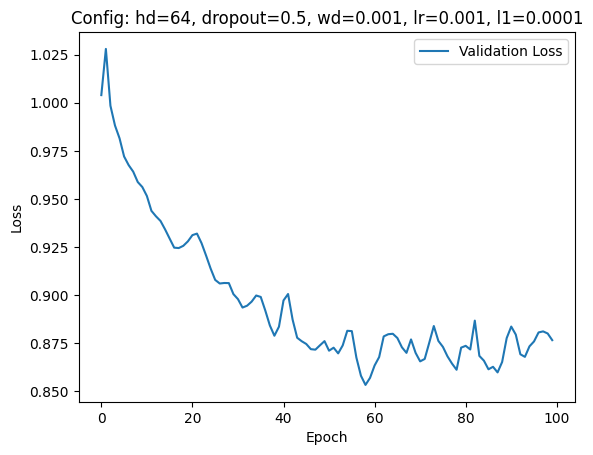

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8698


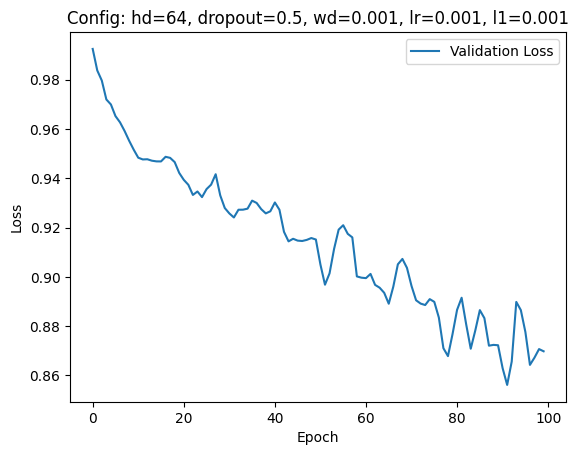

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8609


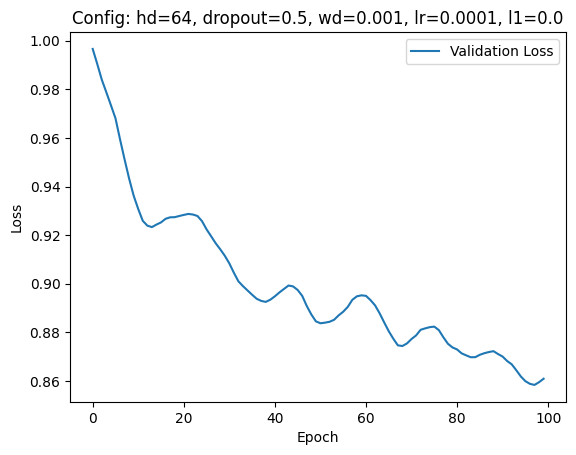

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8687


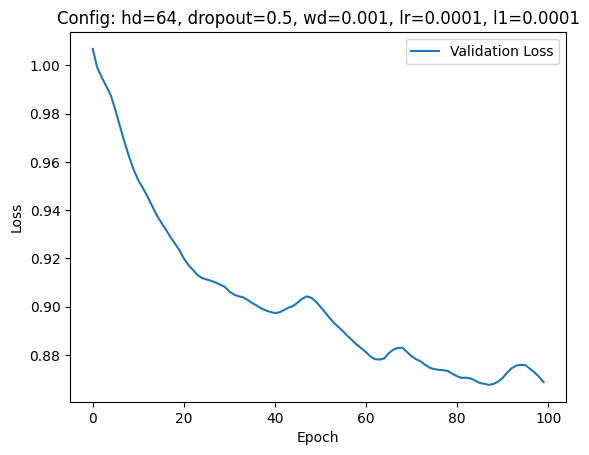

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8793


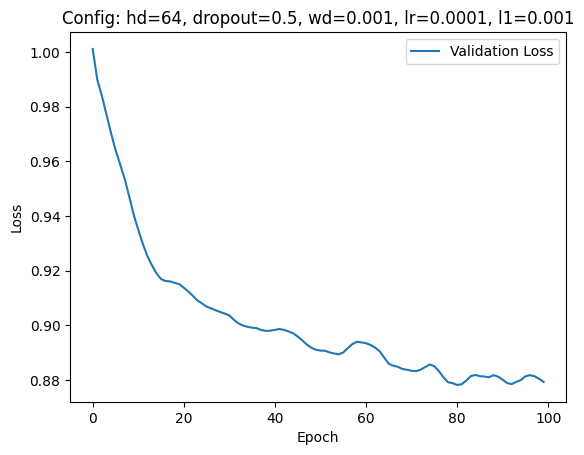

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9379


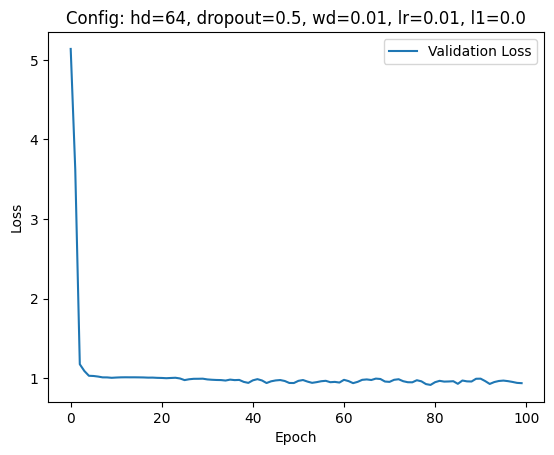

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0005


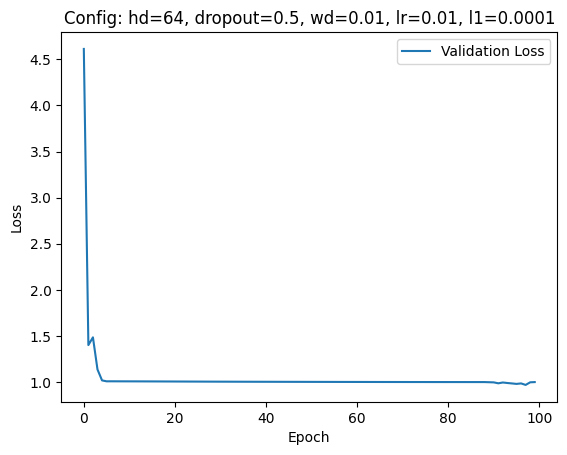

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9732


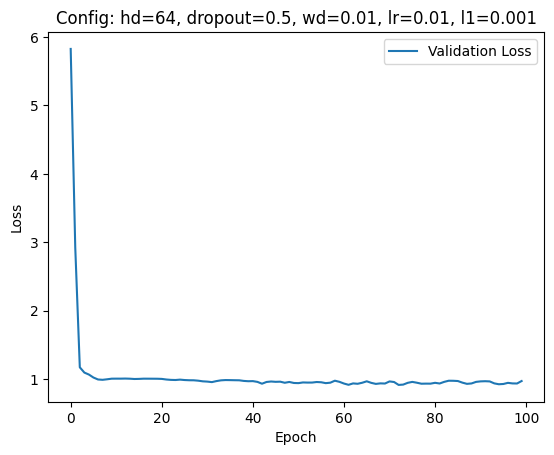

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8584


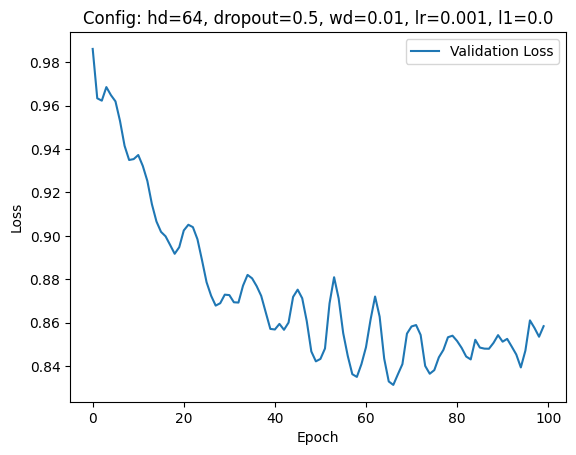

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8544


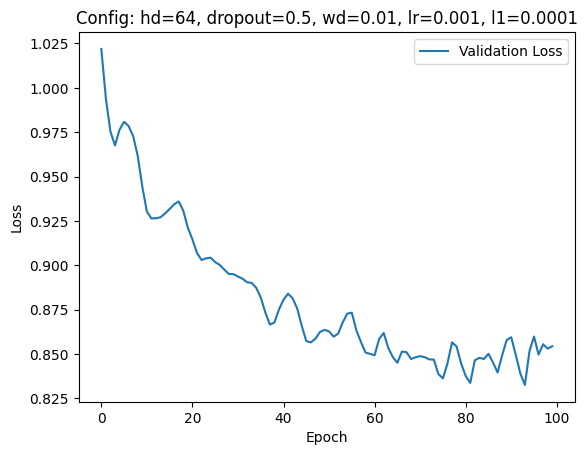

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8578


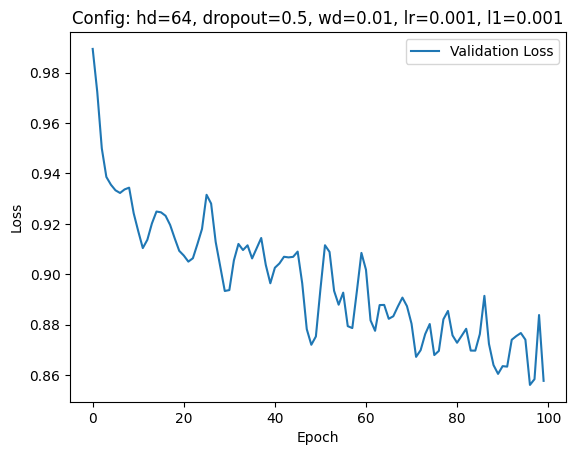

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8919


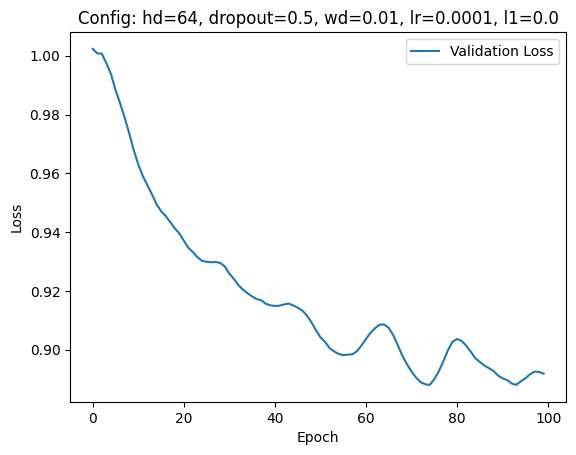

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8752


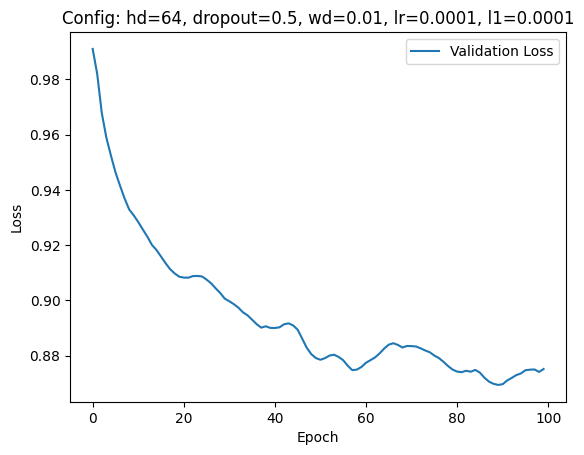

INFO:models.ffnn:Grid search: hidden_dim=64, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=64, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8782


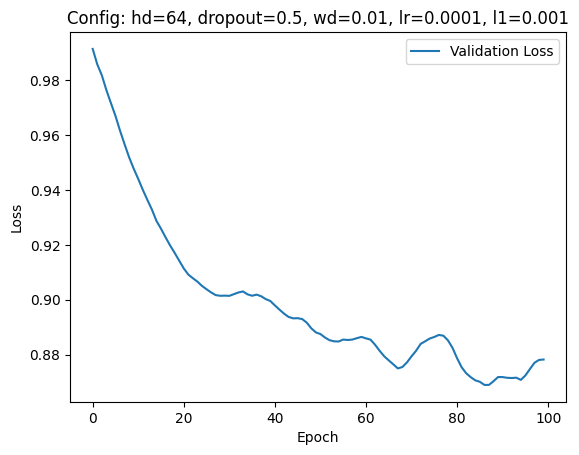

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8735


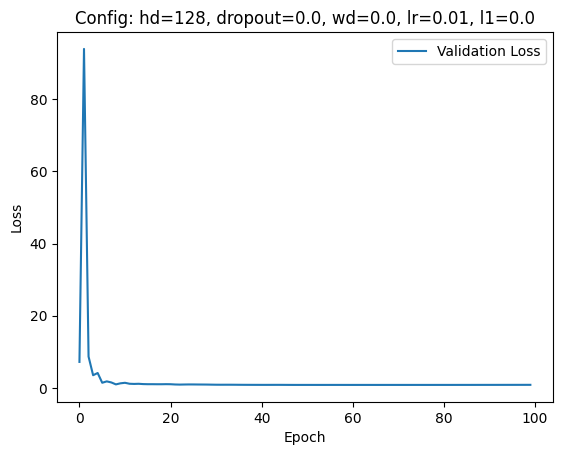

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9411


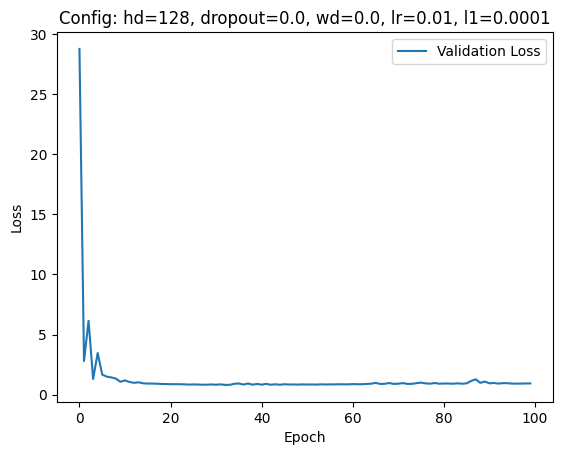

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0313


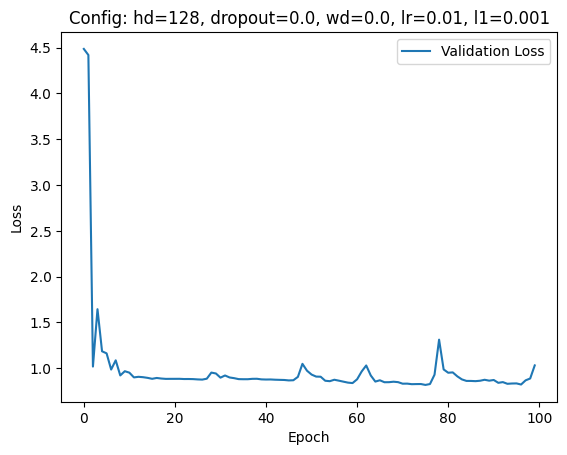

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0907


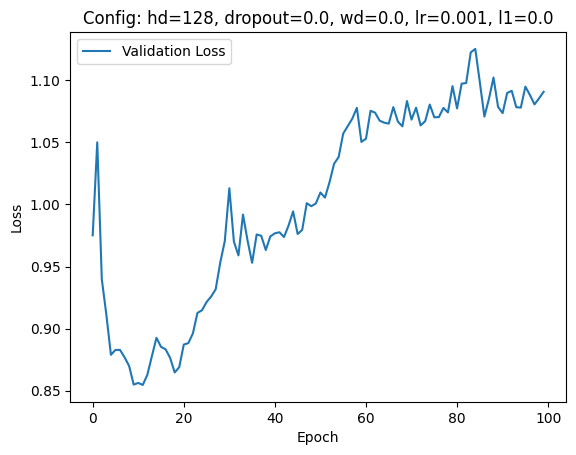

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0354


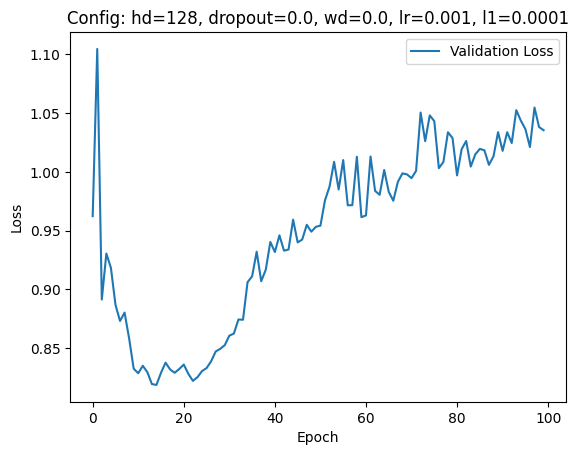

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9256


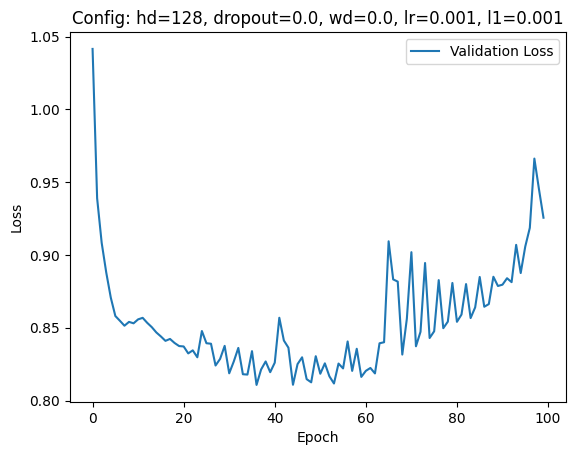

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0069


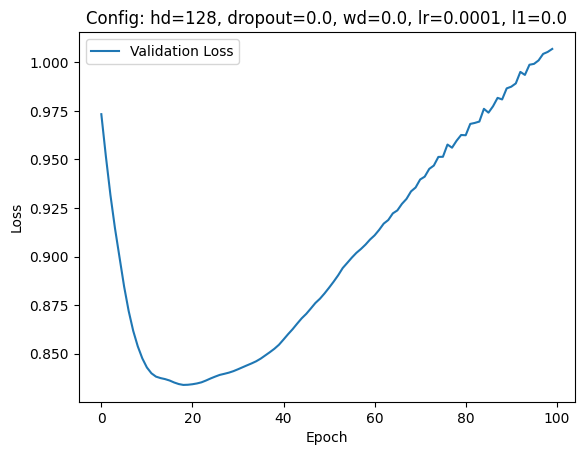

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9515


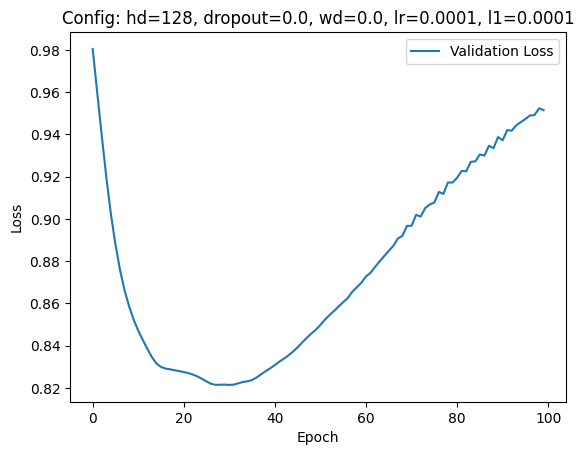

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8220


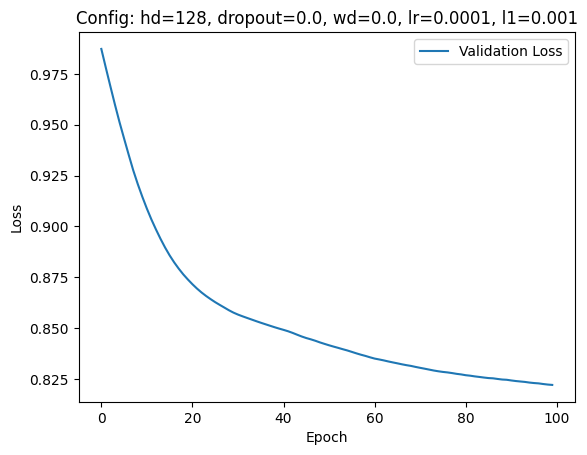

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9897


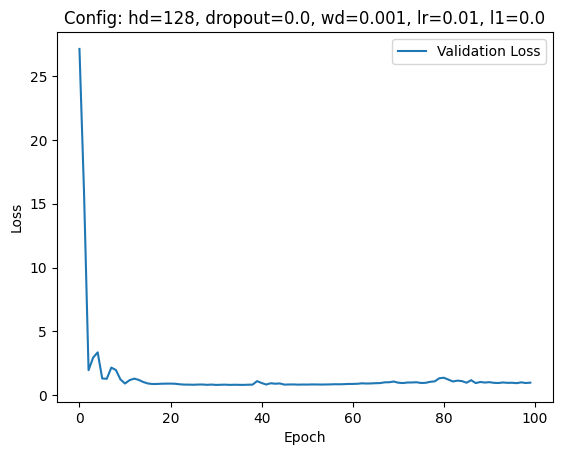

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9360


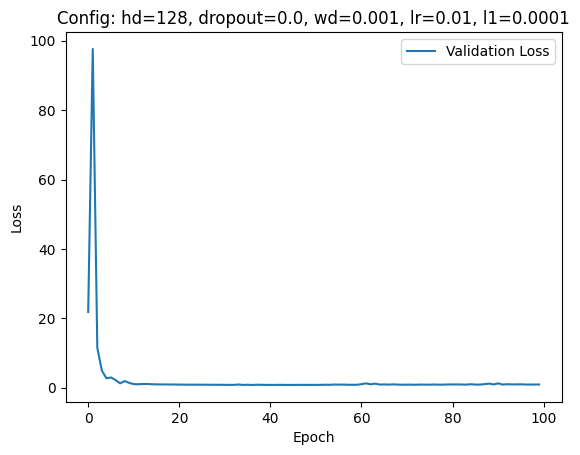

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8424


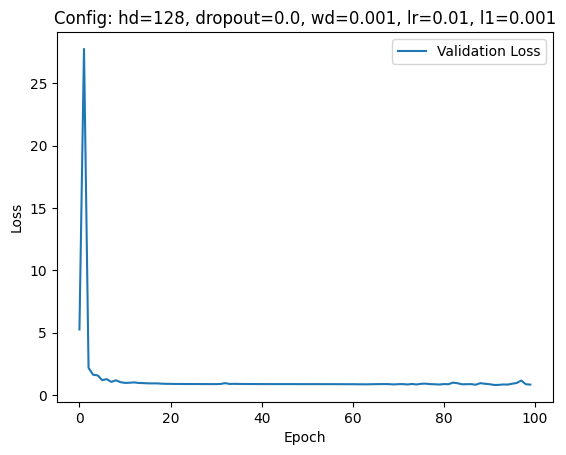

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.1131


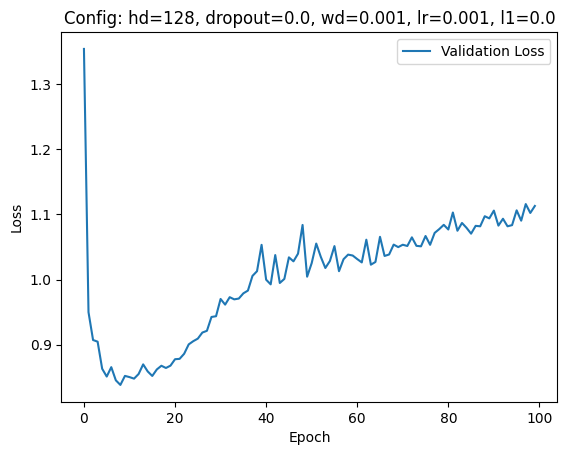

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0706


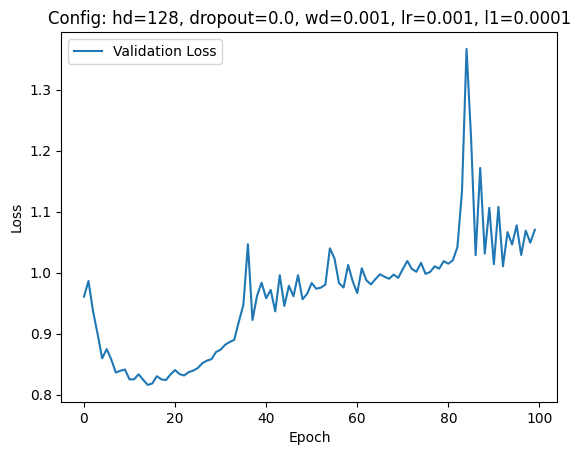

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0702


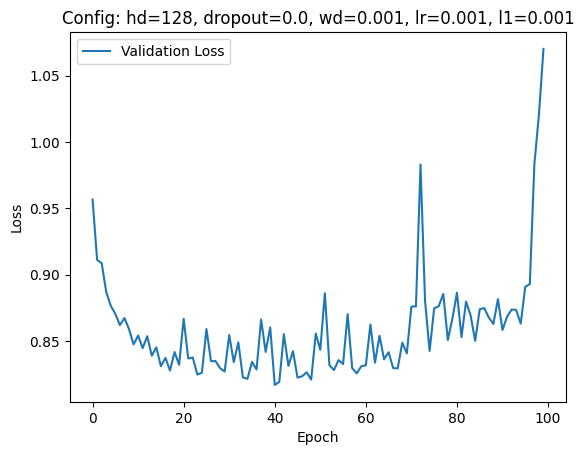

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9964


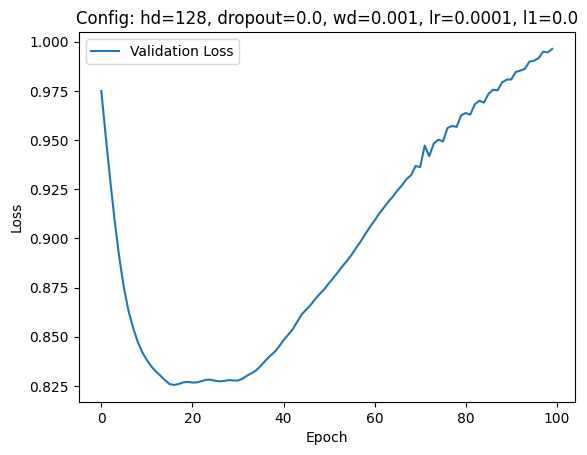

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9542


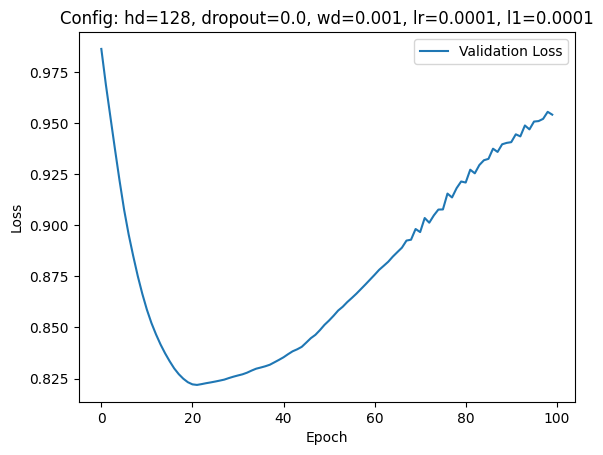

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8170


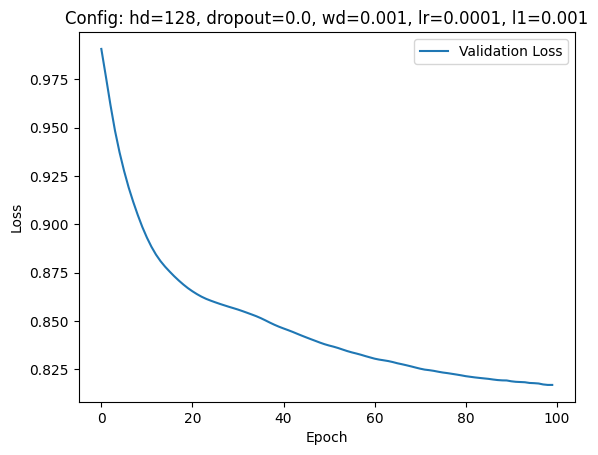

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0291


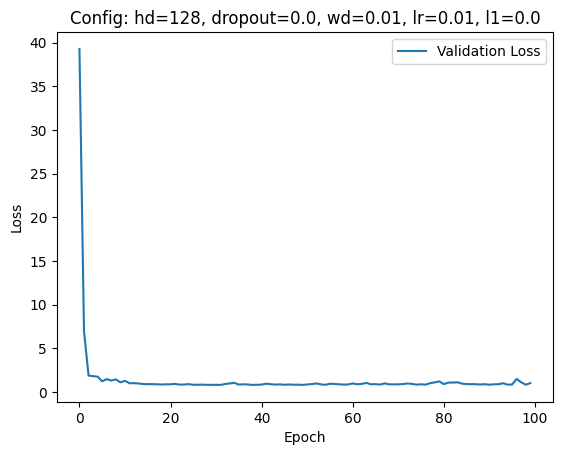

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8551


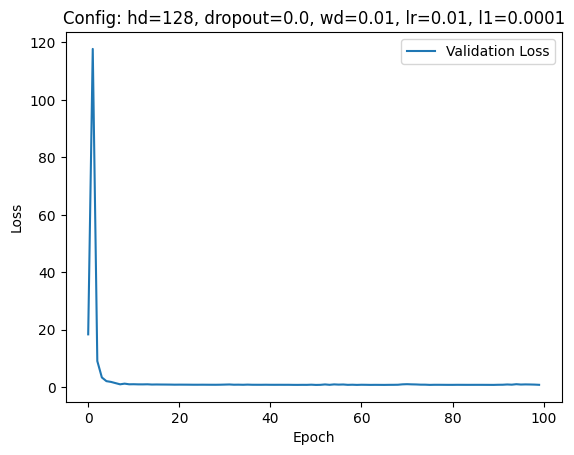

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0071


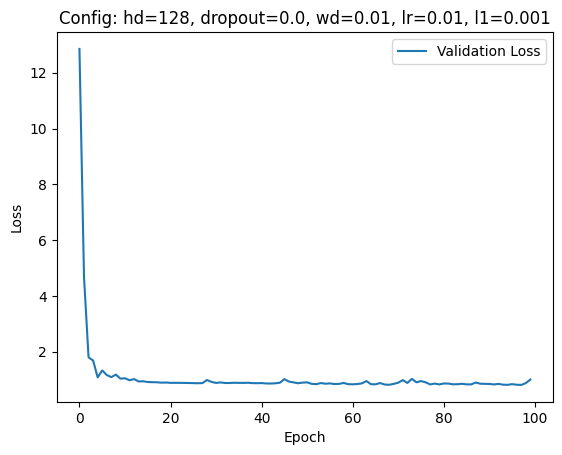

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0587


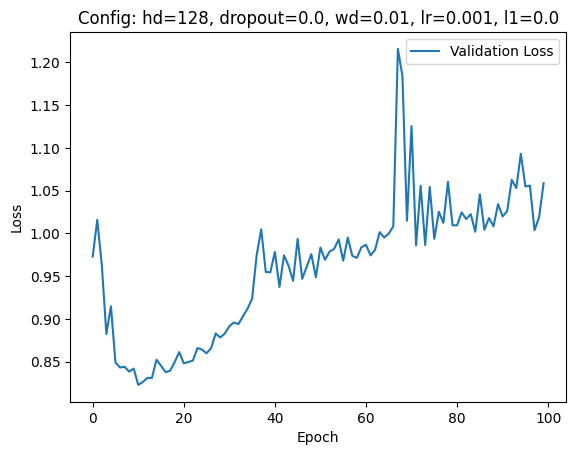

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0027


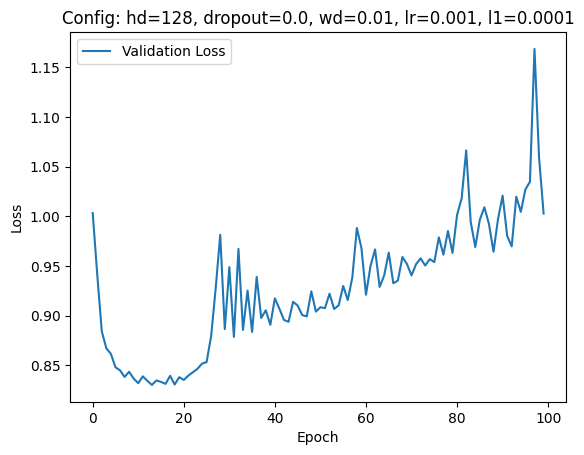

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9999


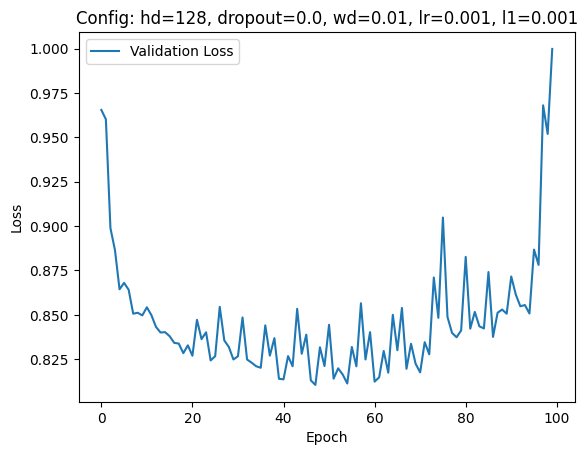

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9777


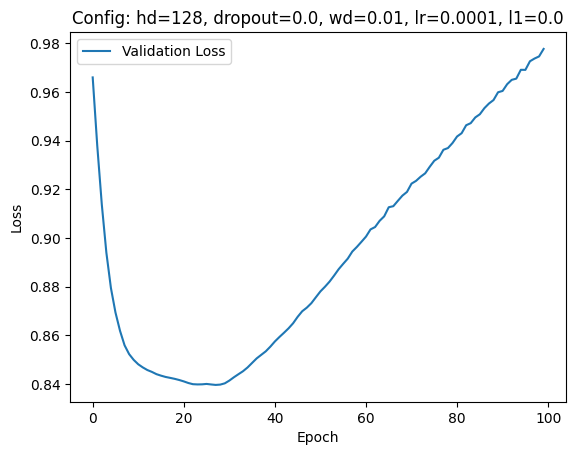

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9122


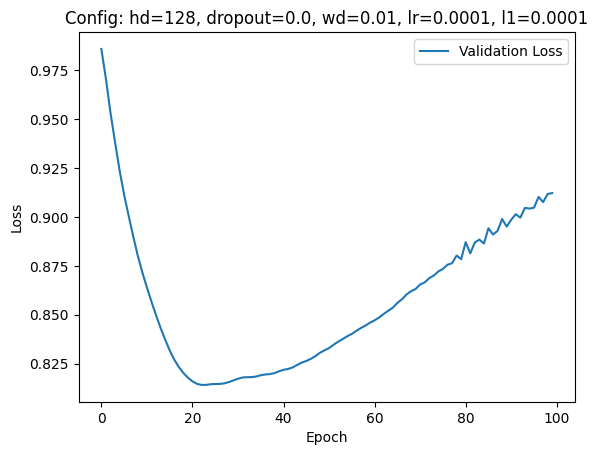

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8200


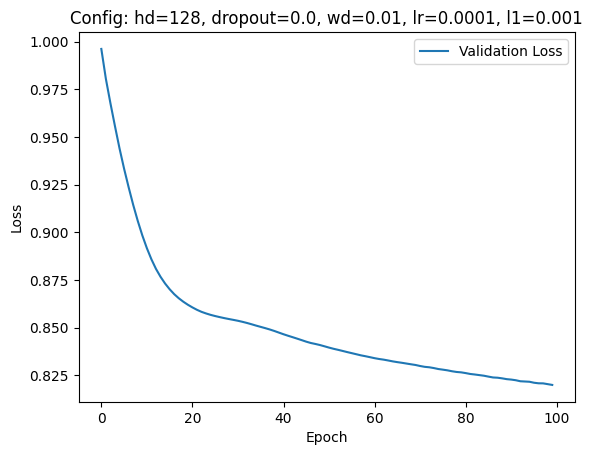

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9027


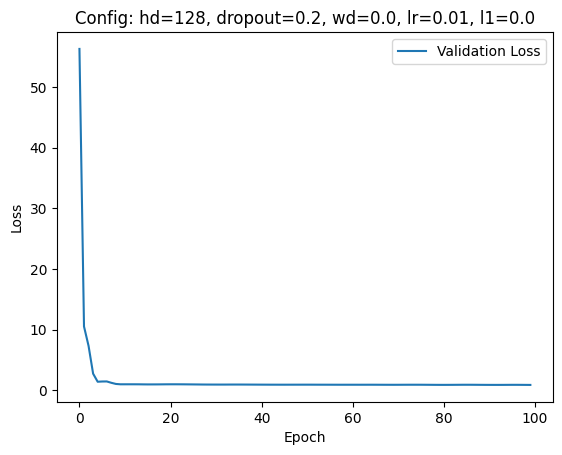

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9316


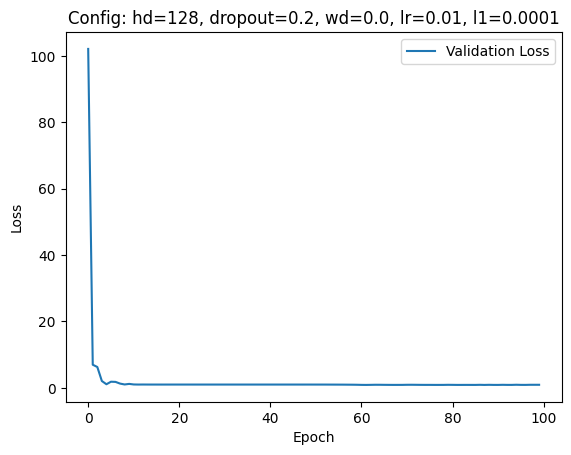

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8564


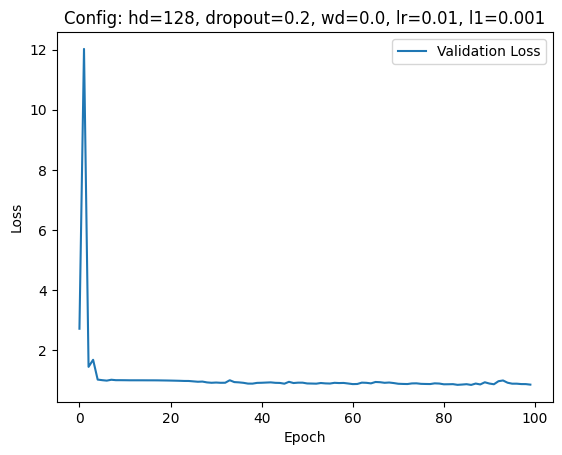

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0287


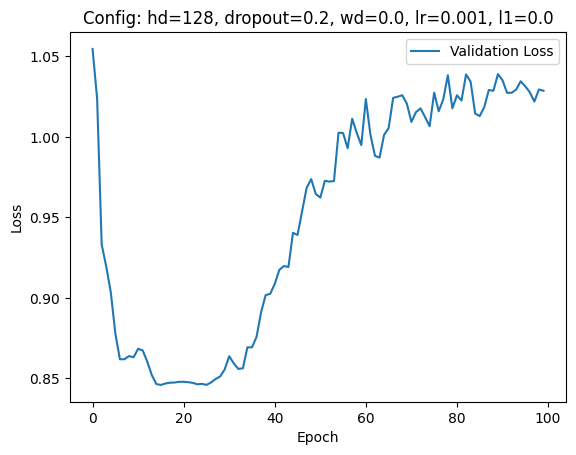

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0070


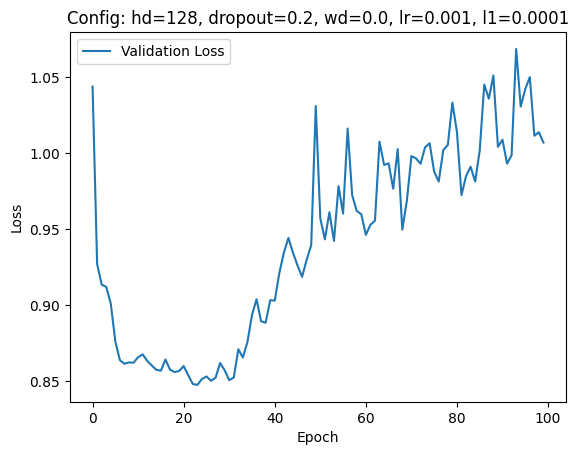

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8731


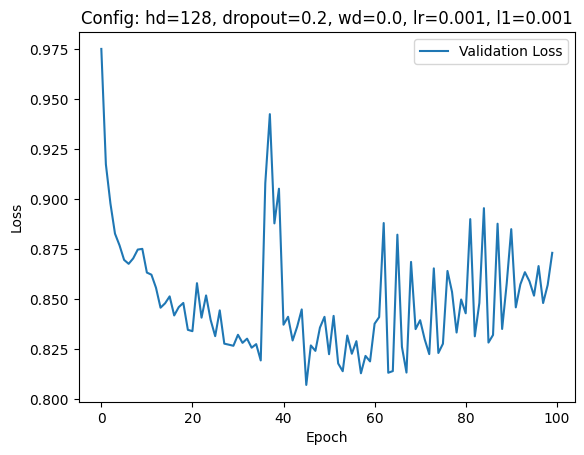

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9172


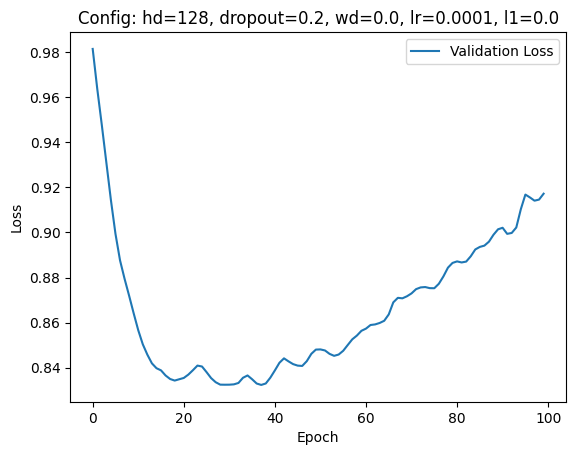

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9028


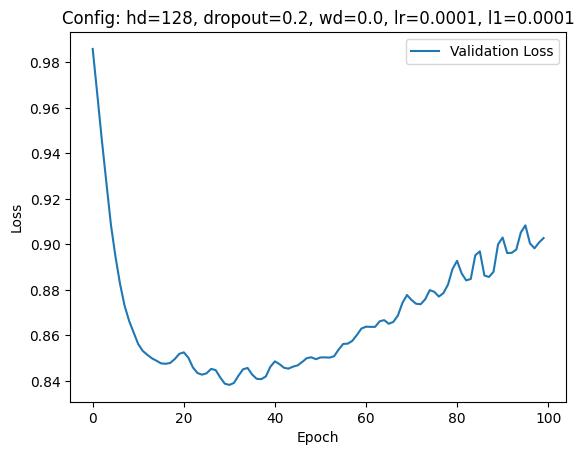

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8234


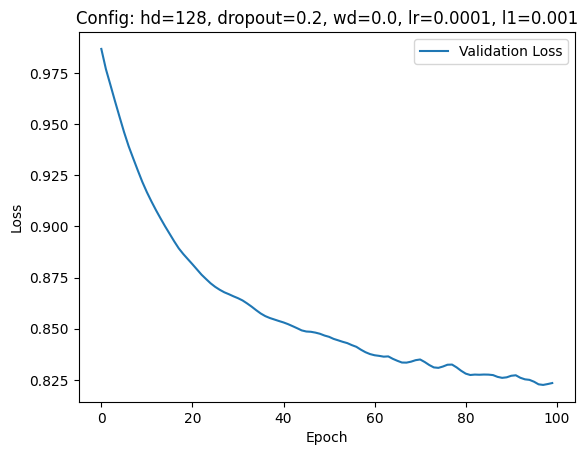

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0024


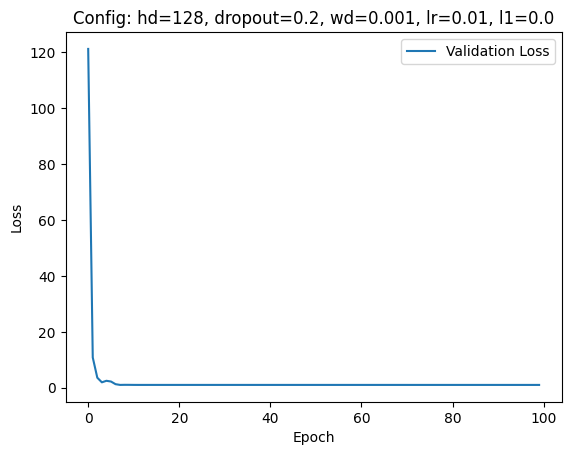

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0024


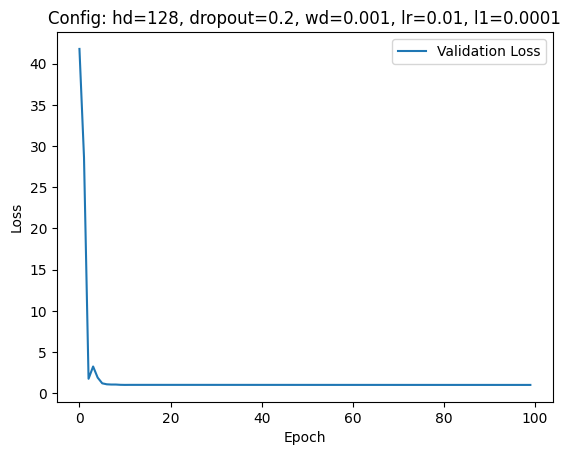

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9112


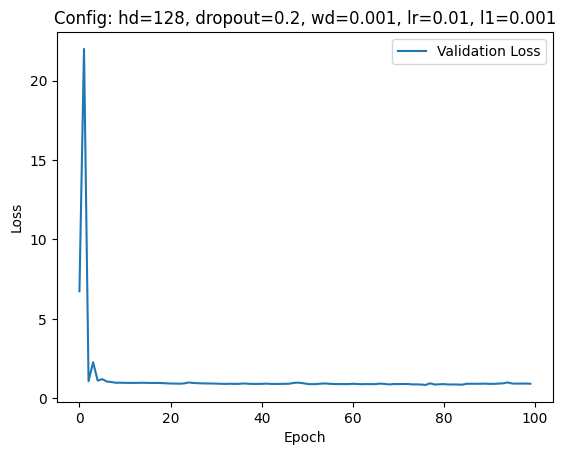

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0164


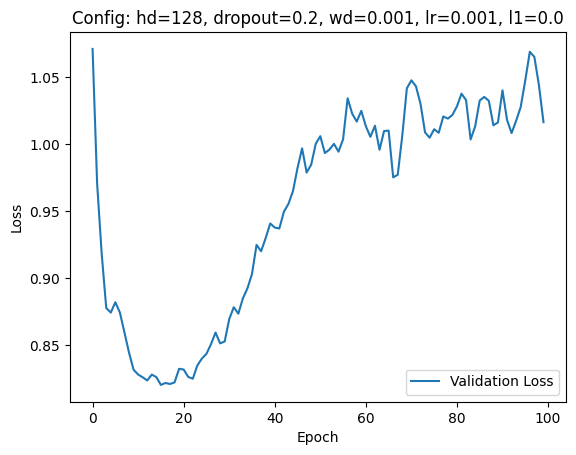

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0119


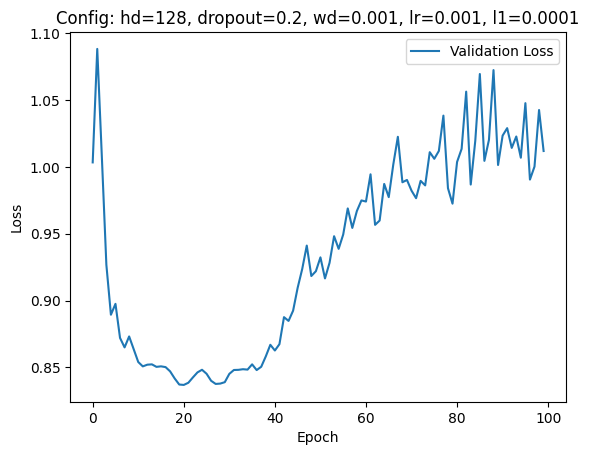

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9316


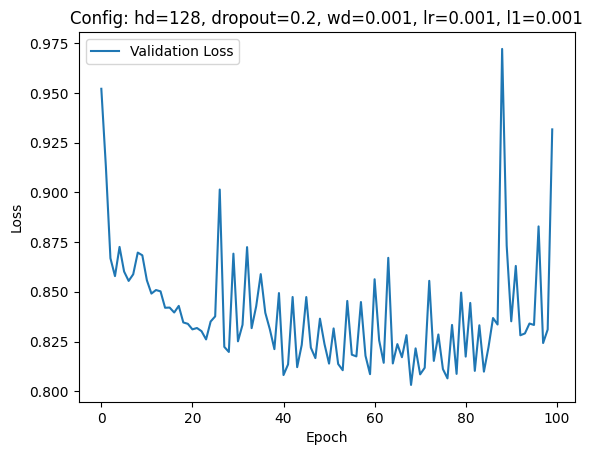

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9110


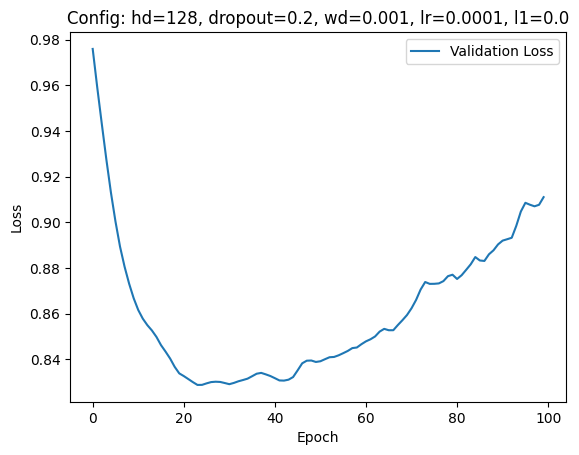

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9037


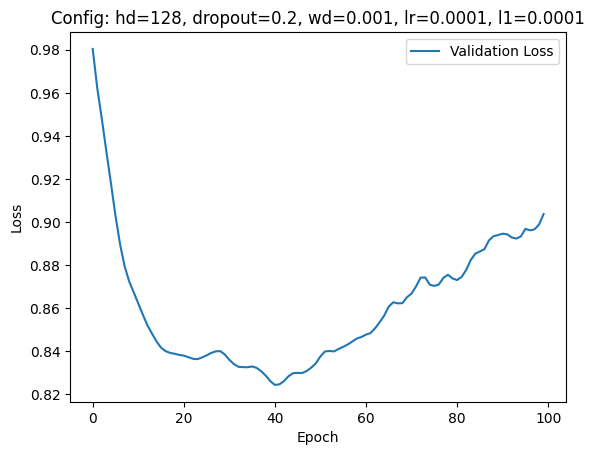

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8379


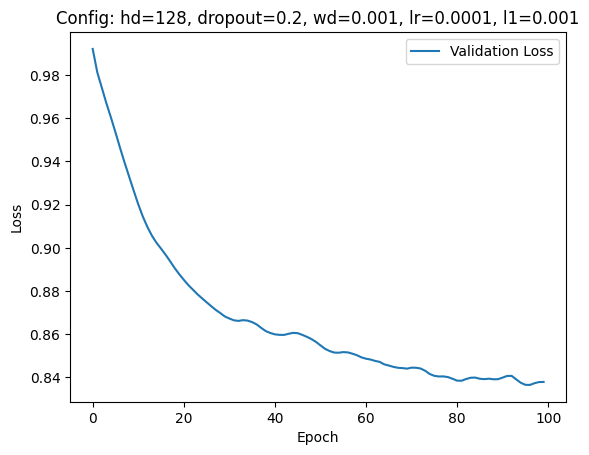

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8983


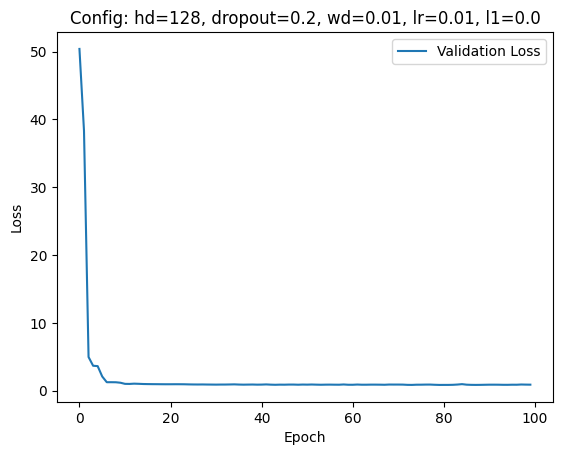

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8730


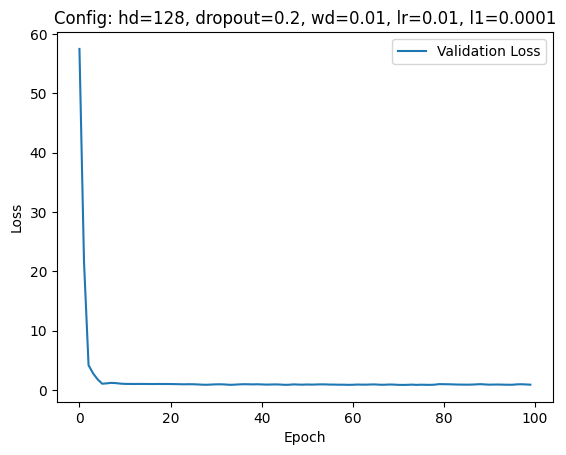

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8780


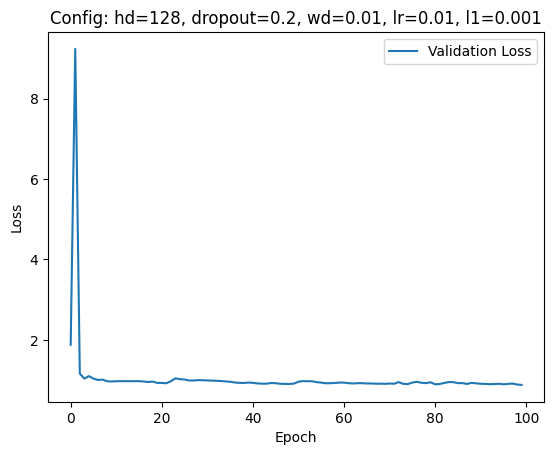

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9795


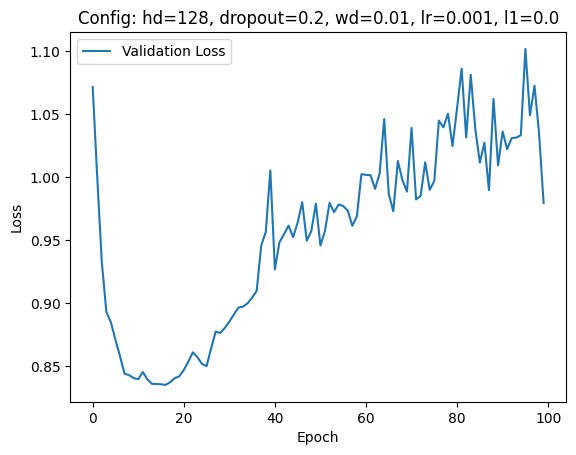

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0034


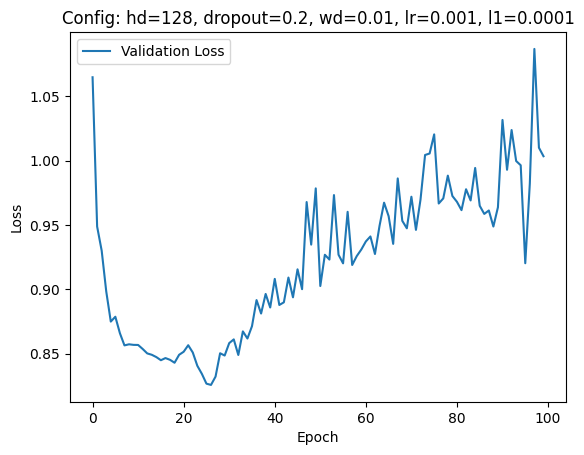

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8191


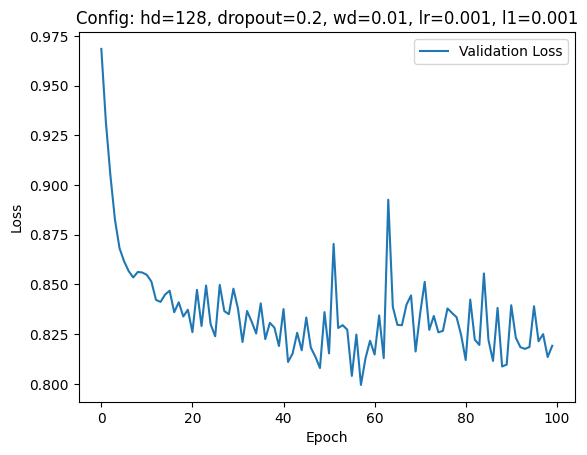

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8784


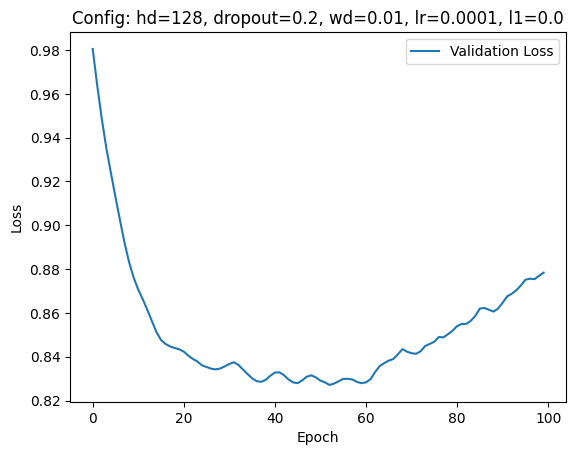

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8877


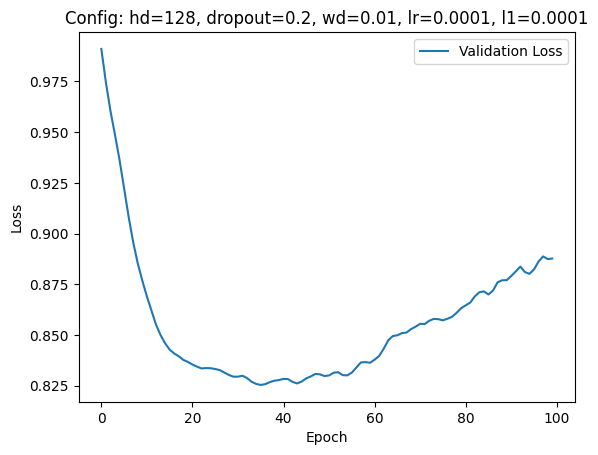

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8319


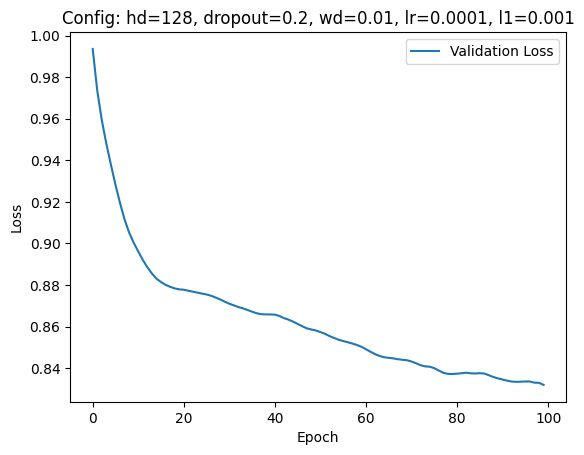

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0001


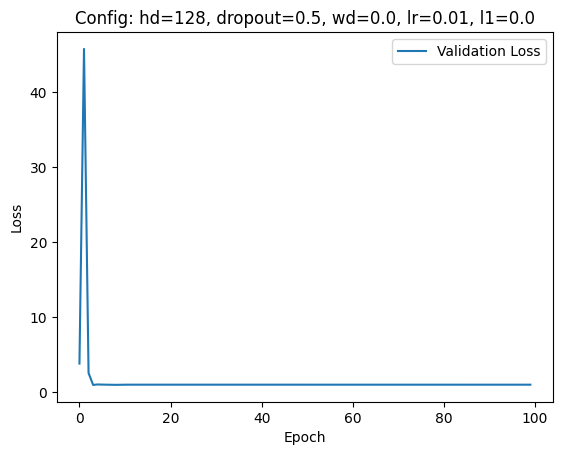

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9549


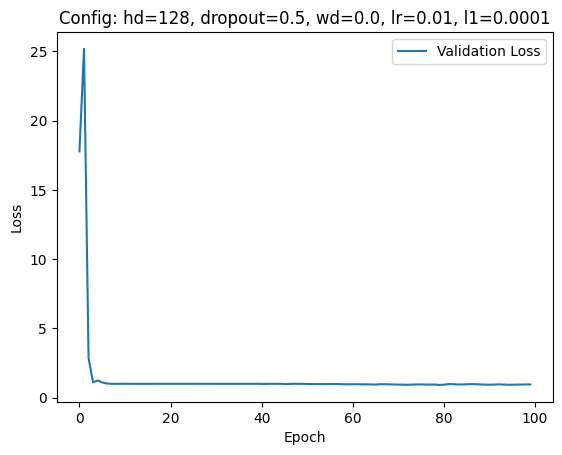

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9149


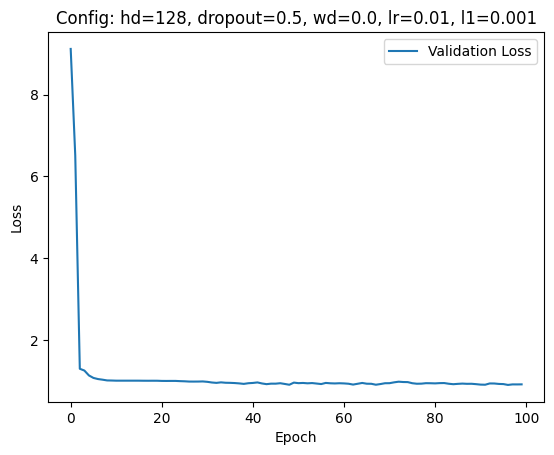

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9163


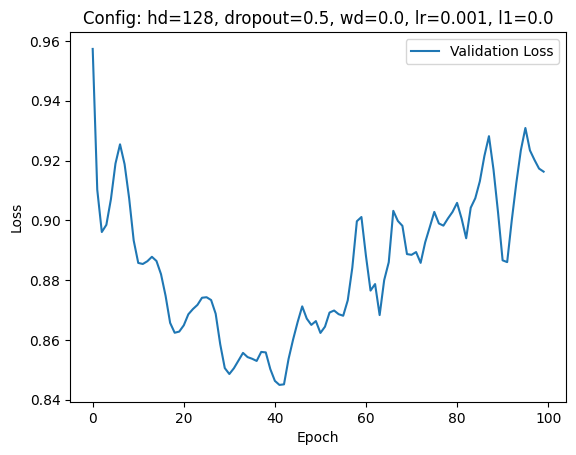

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9146


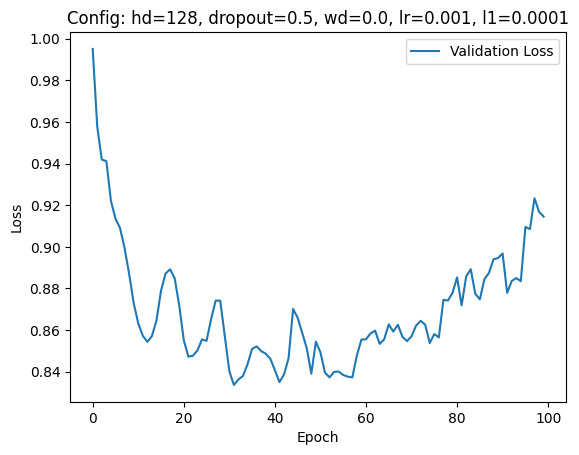

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8251


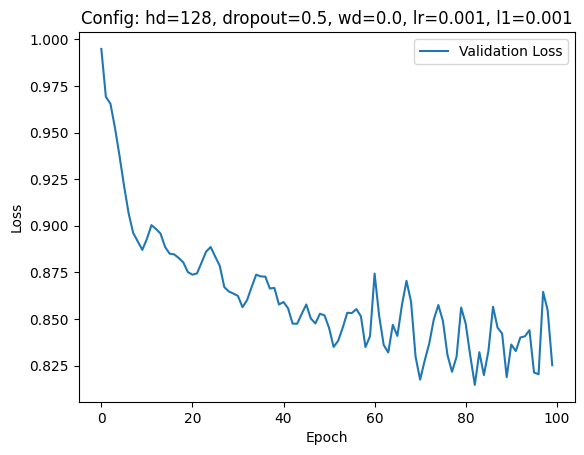

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8559


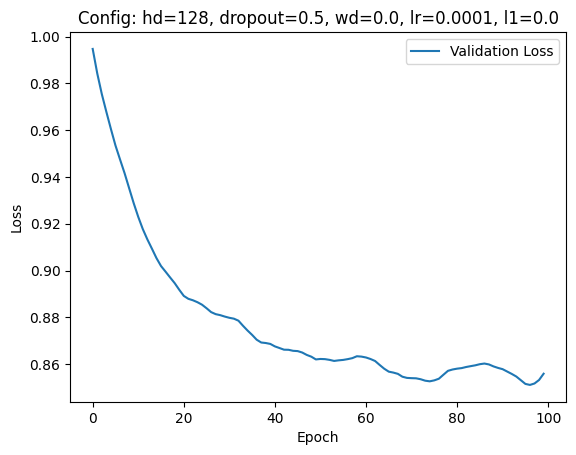

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8490


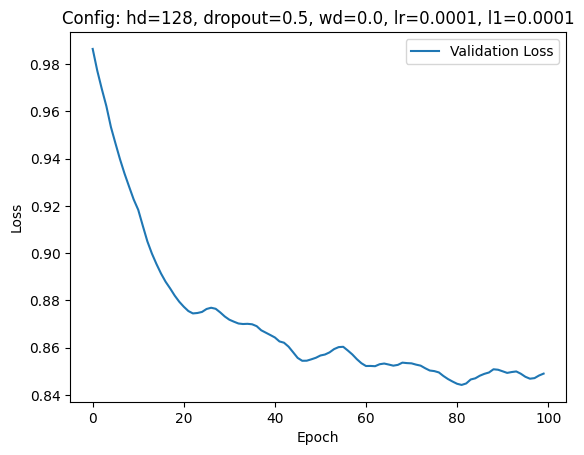

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8480


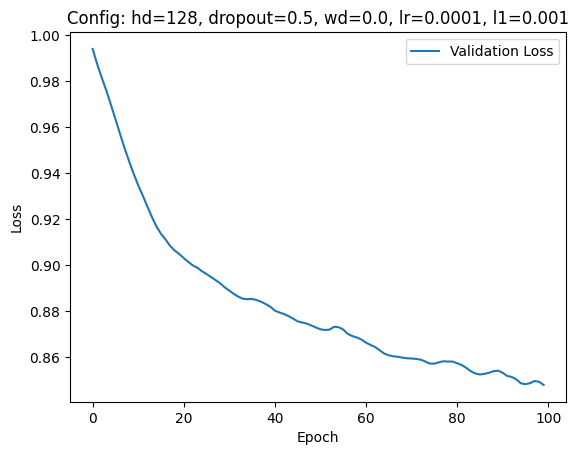

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9578


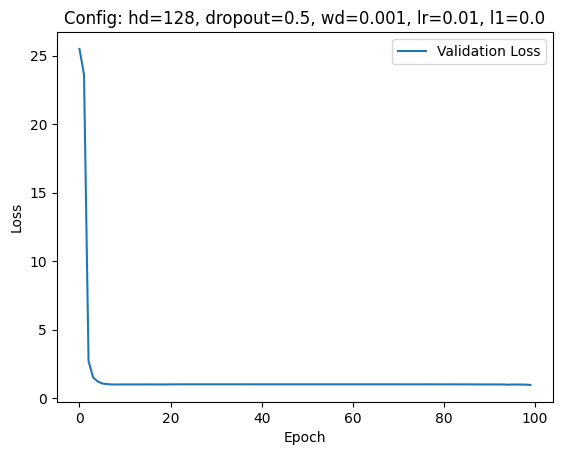

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9242


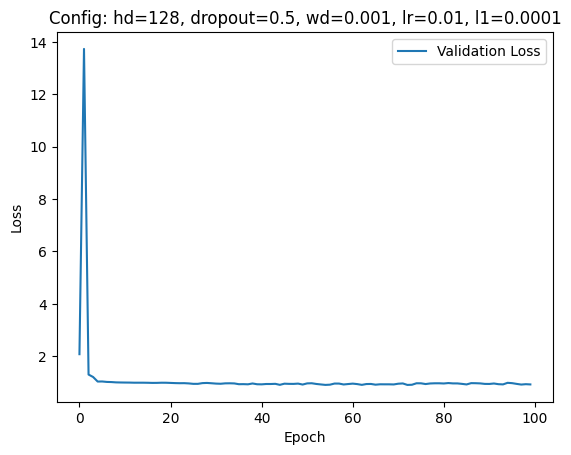

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0005


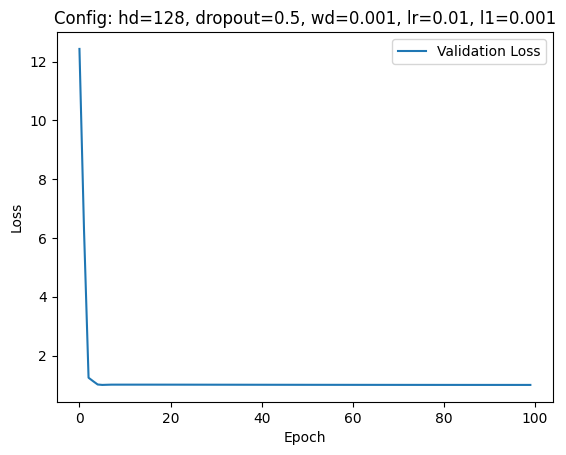

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9566


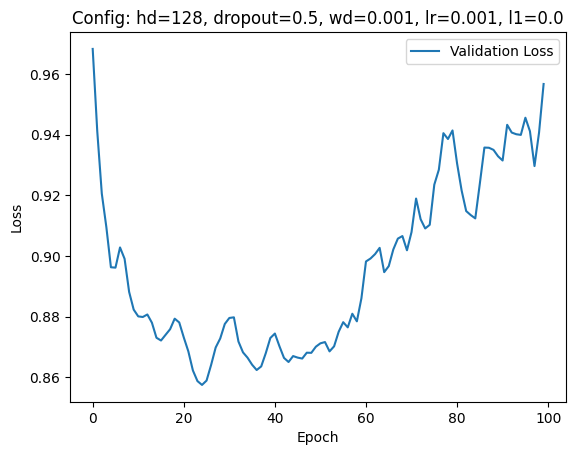

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9426


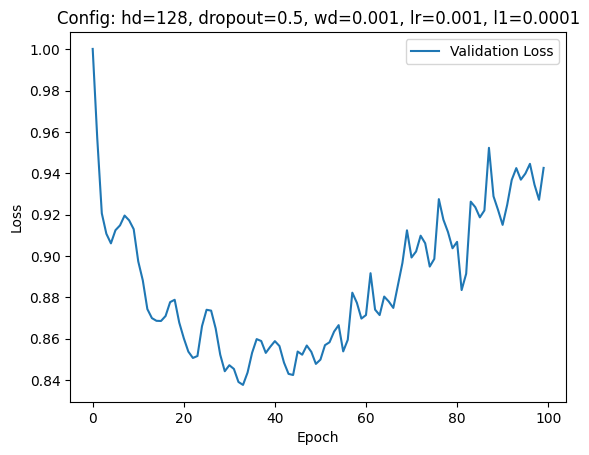

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8321


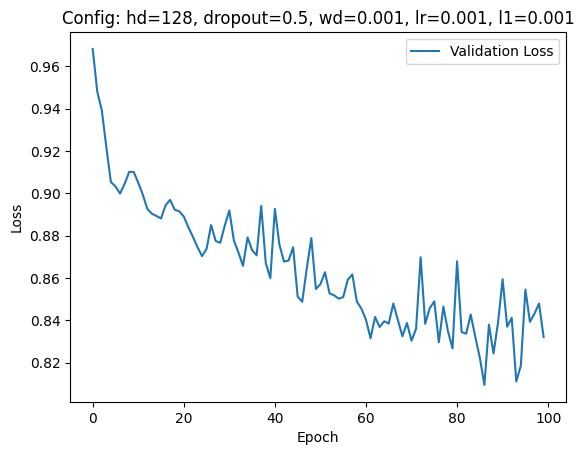

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8521


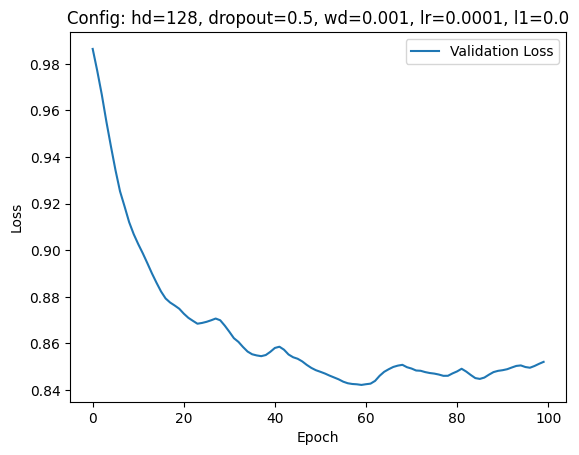

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8479


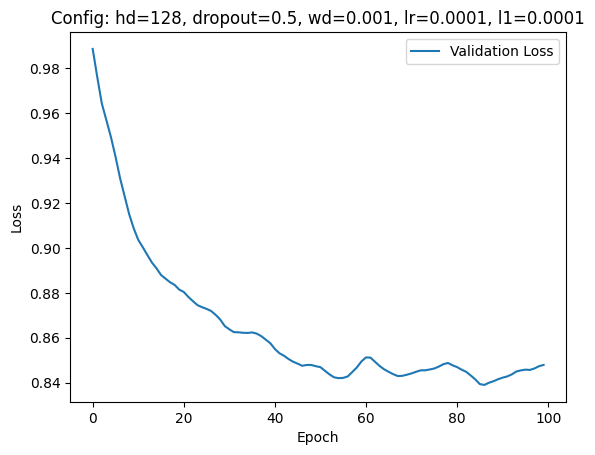

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8662


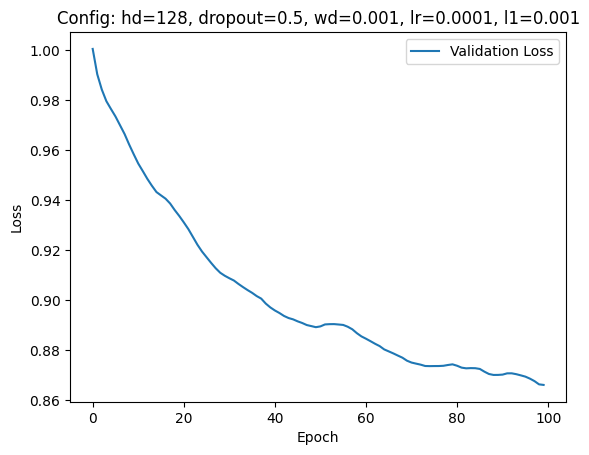

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0018


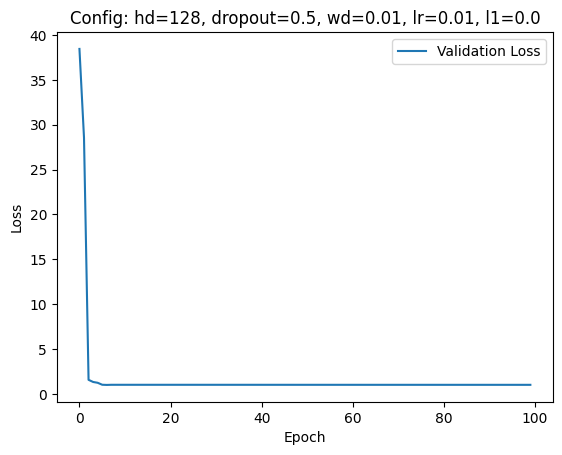

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9388


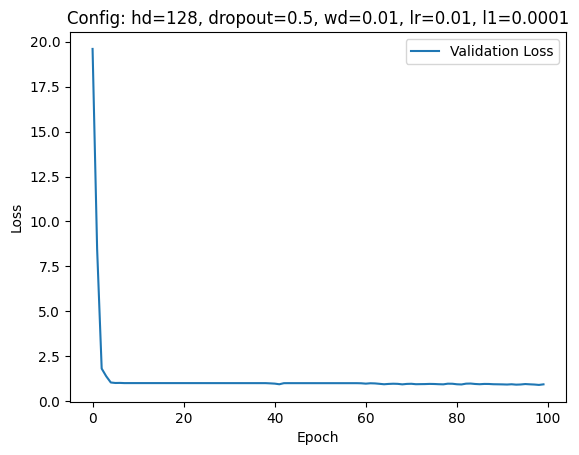

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9705


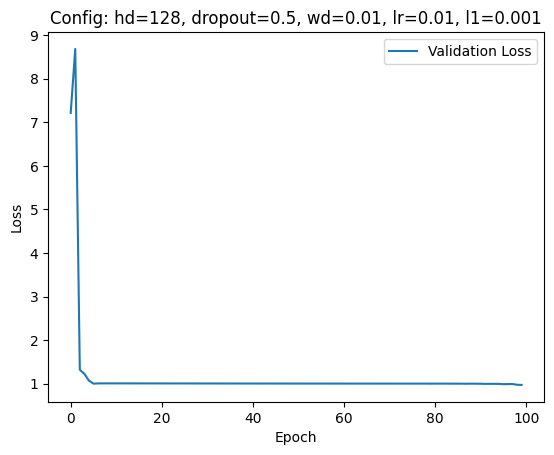

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9113


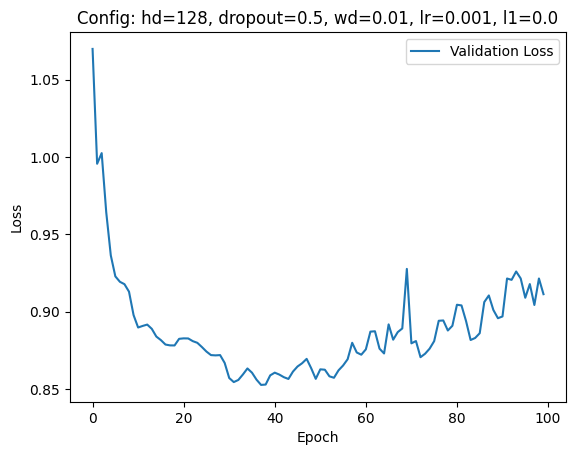

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9206


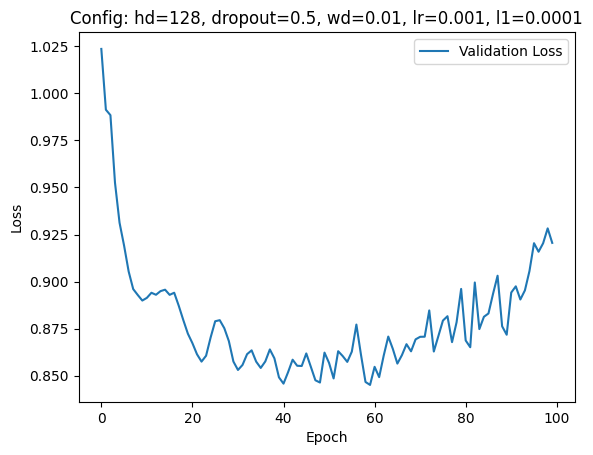

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8153


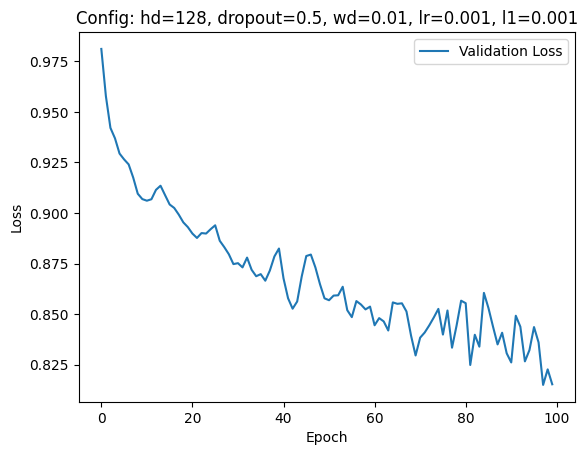

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8375


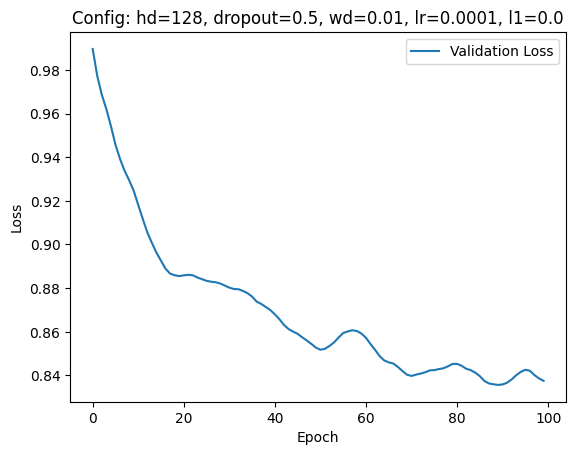

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8413


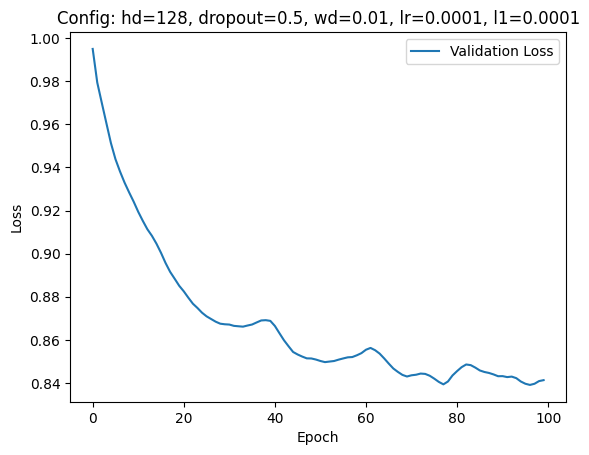

INFO:models.ffnn:Grid search: hidden_dim=128, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=128, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8682


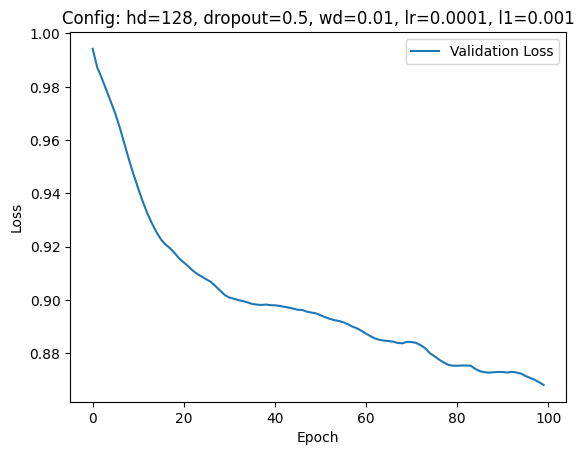

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9237


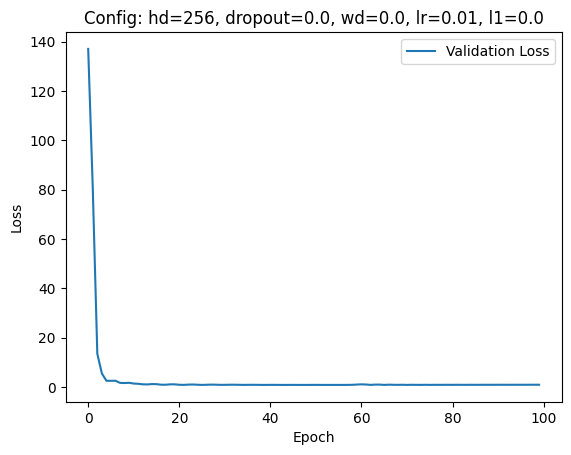

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8836


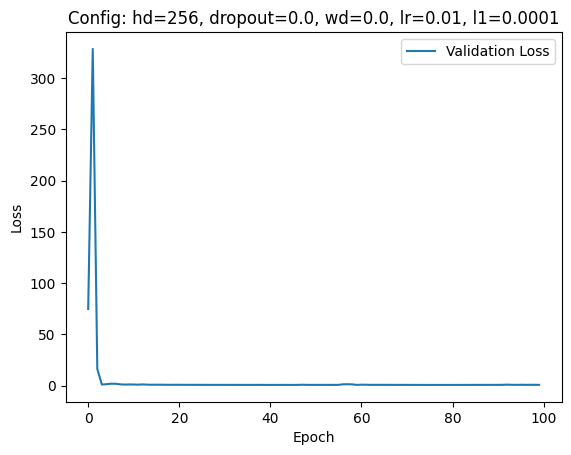

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8083


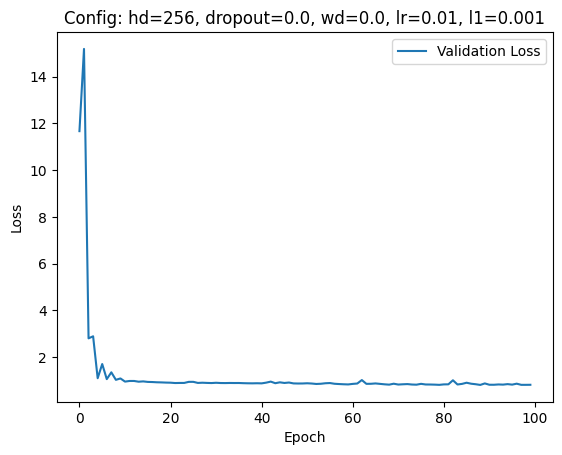

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0957


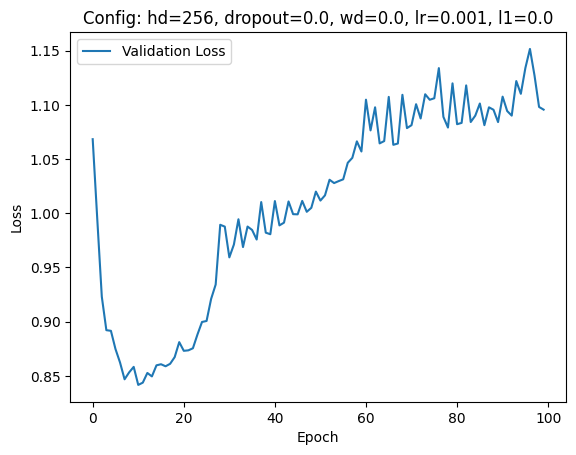

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0849


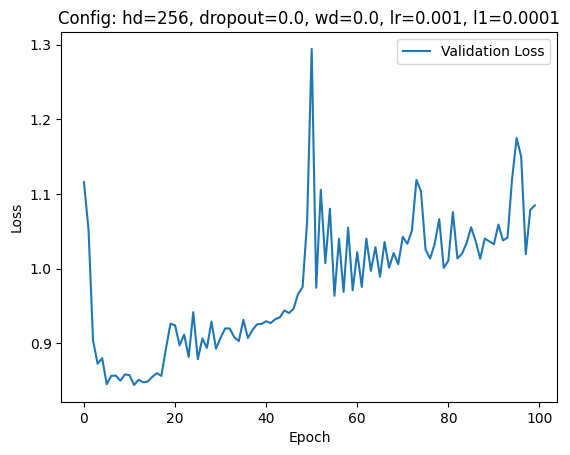

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8953


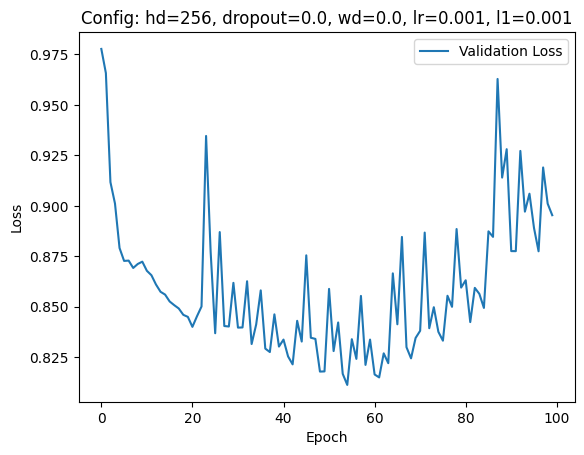

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0289


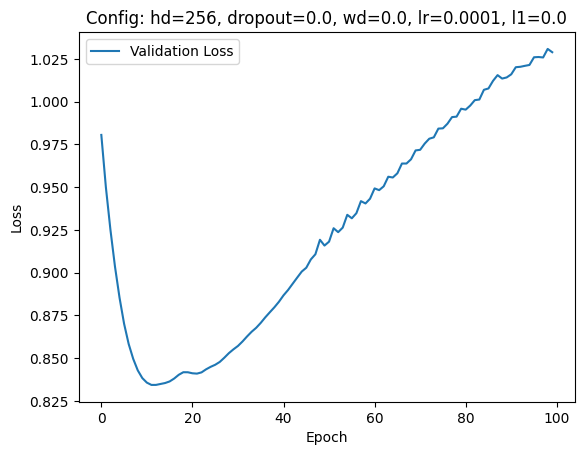

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9859


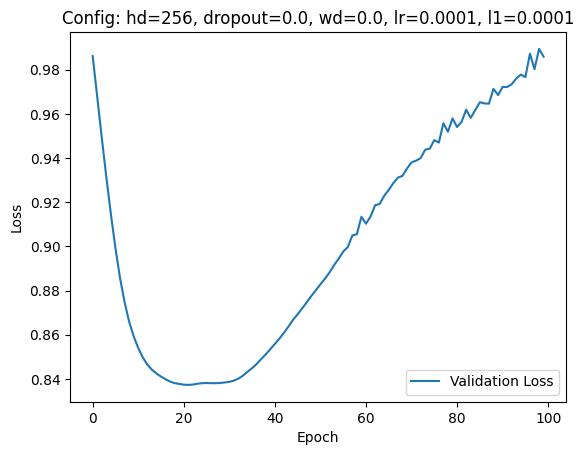

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8219


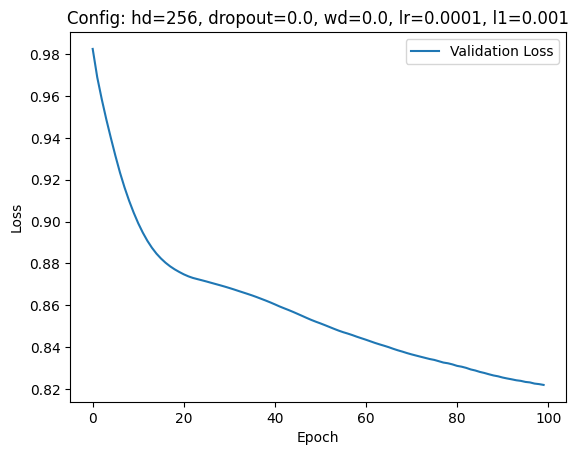

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9704


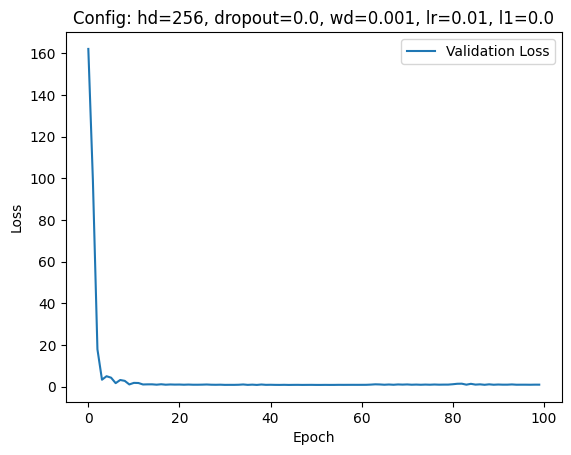

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9789


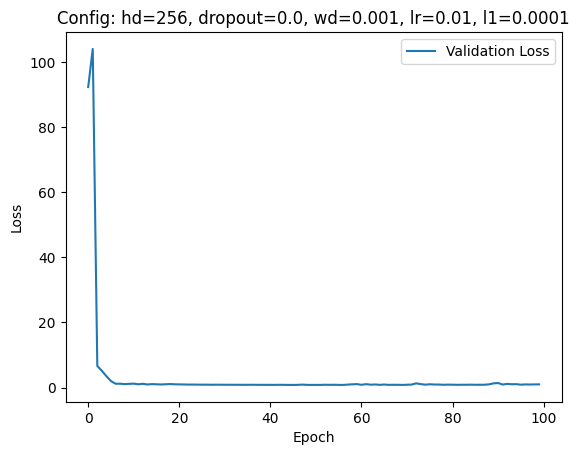

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8486


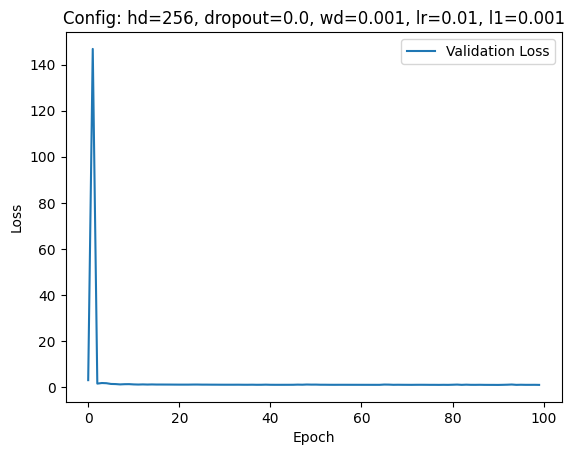

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.1082


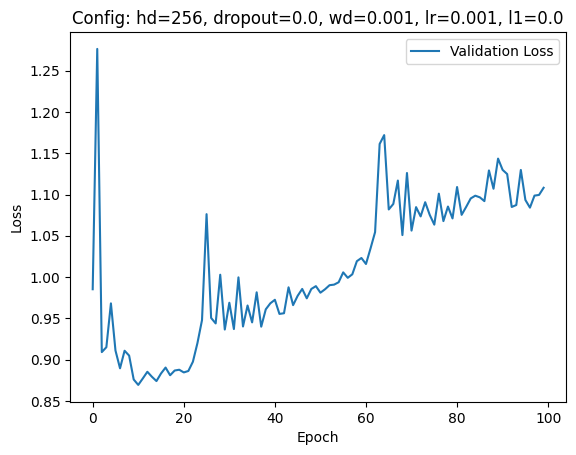

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0457


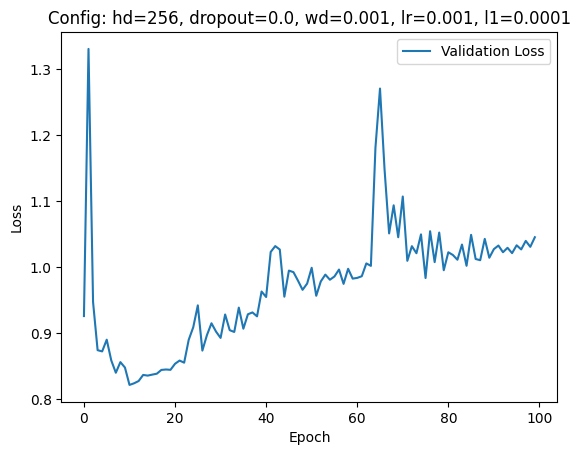

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8614


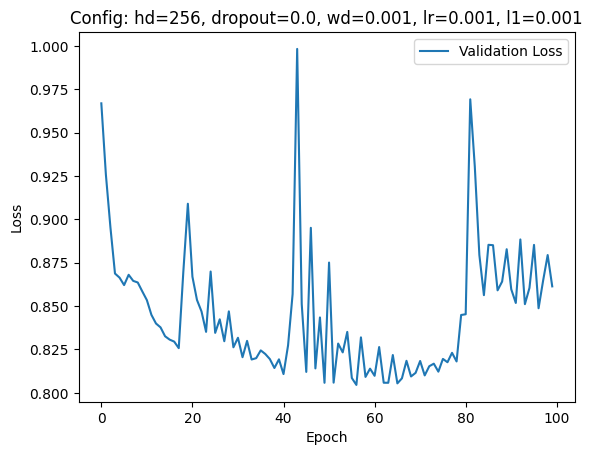

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0548


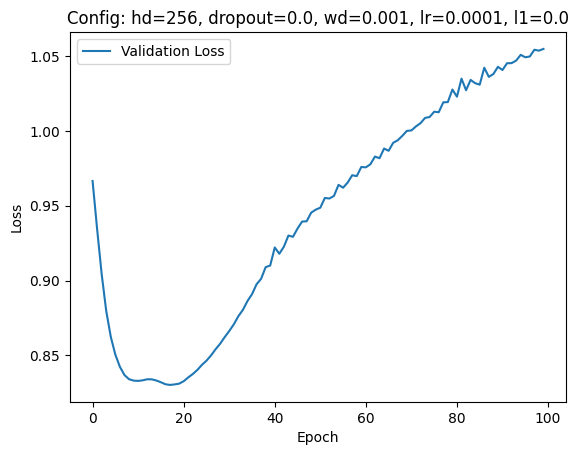

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9925


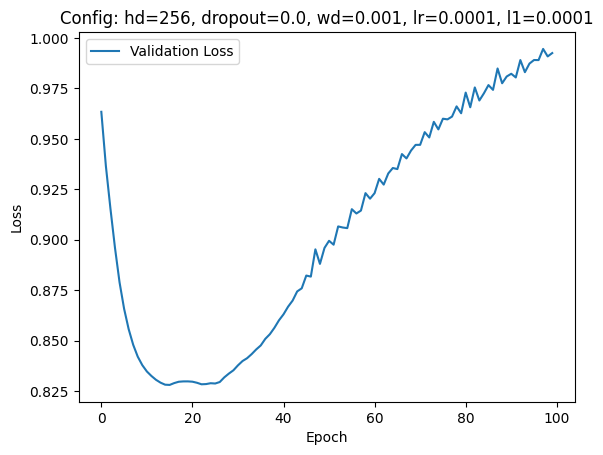

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8168


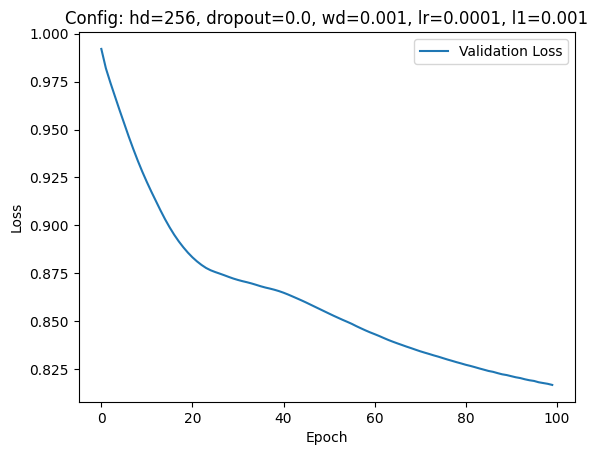

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8518


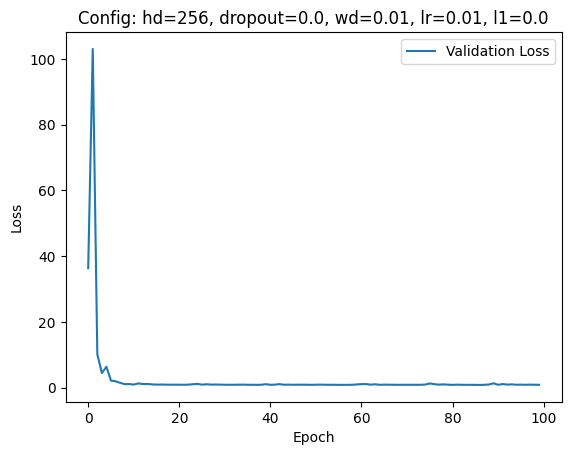

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8283


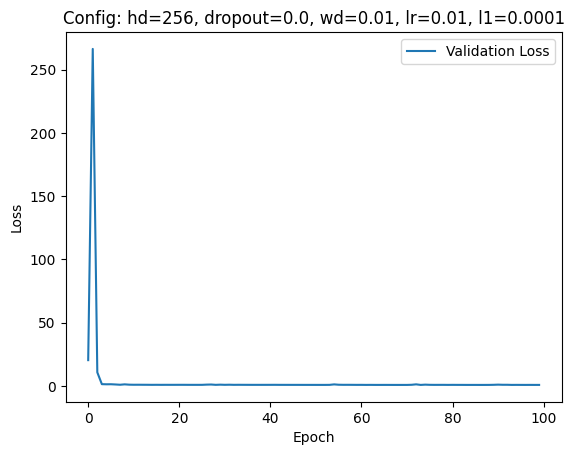

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0013


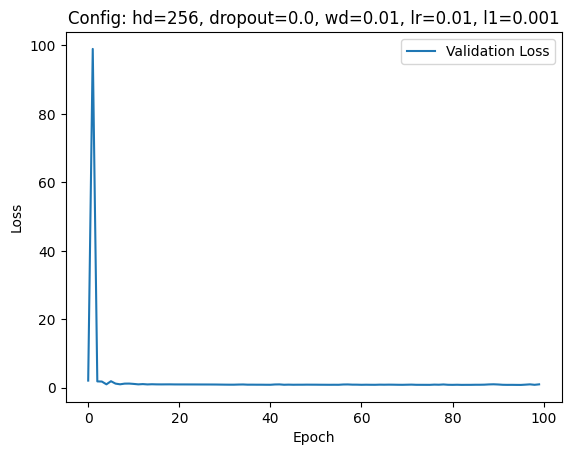

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0824


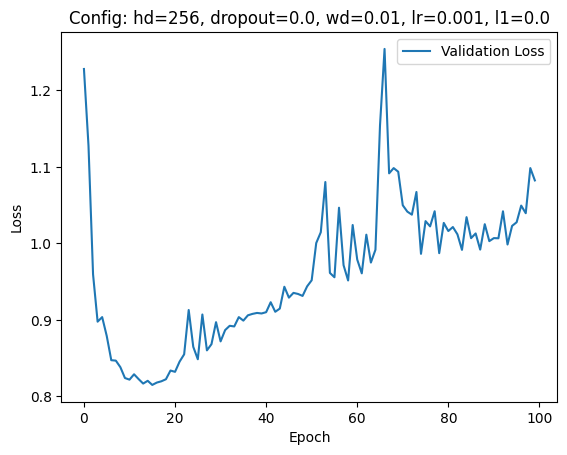

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0177


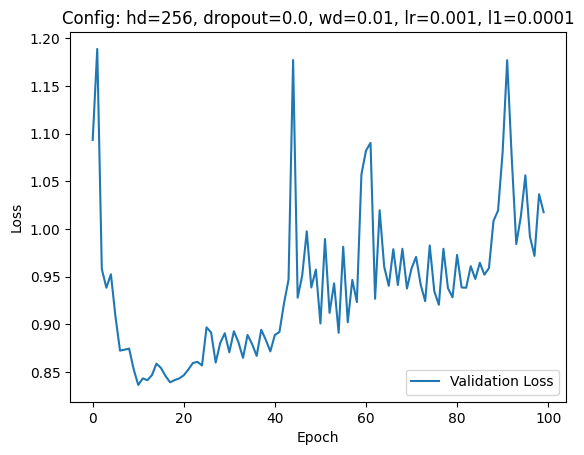

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8481


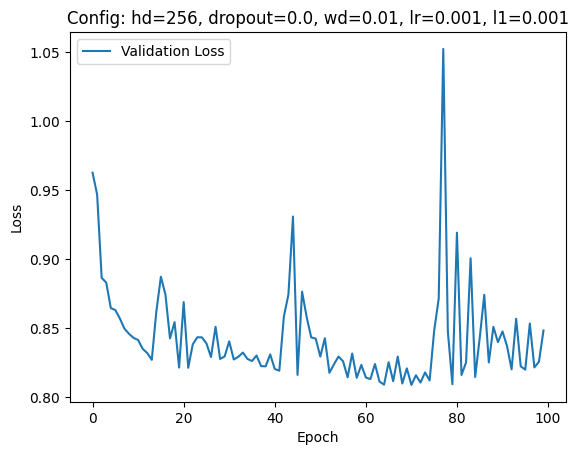

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0032


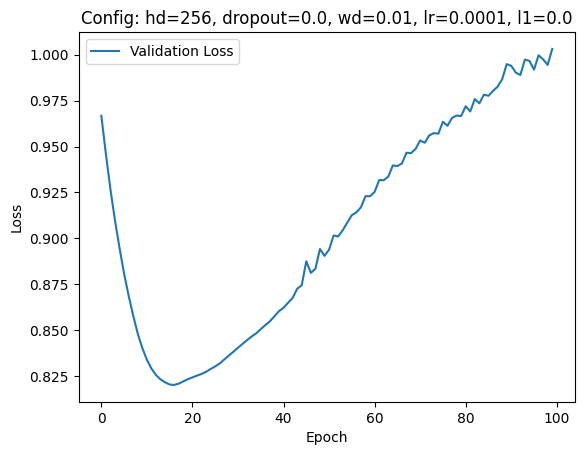

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9511


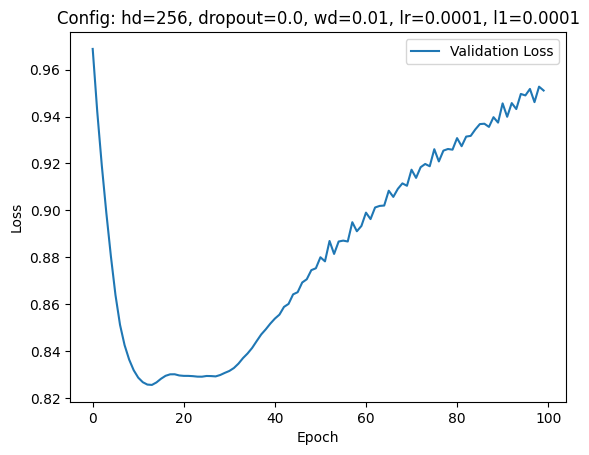

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.0, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.0, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8213


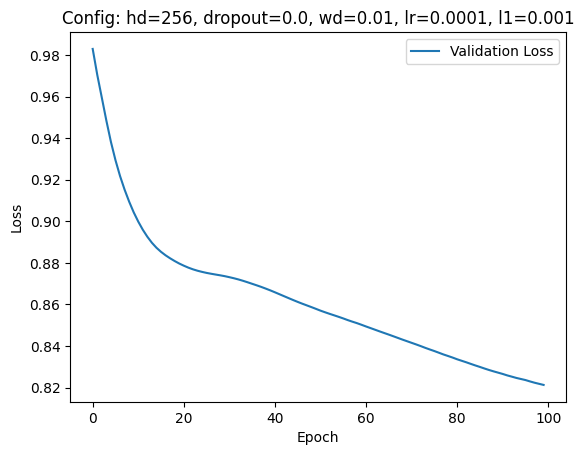

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0015


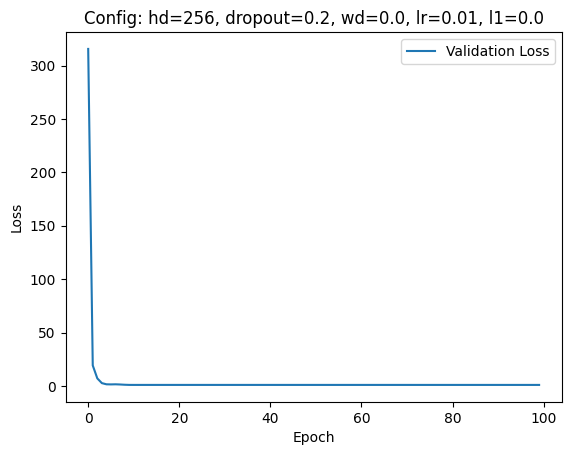

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0014


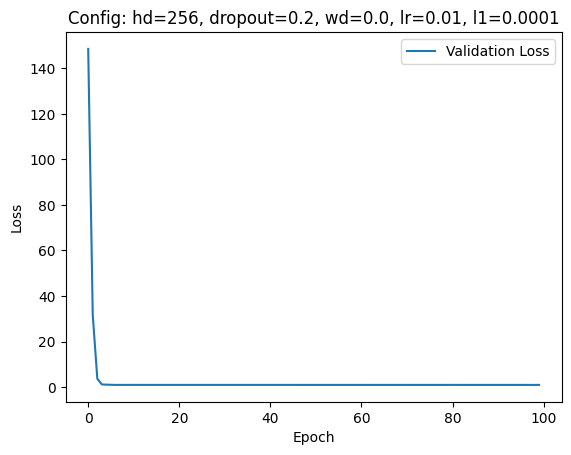

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8764


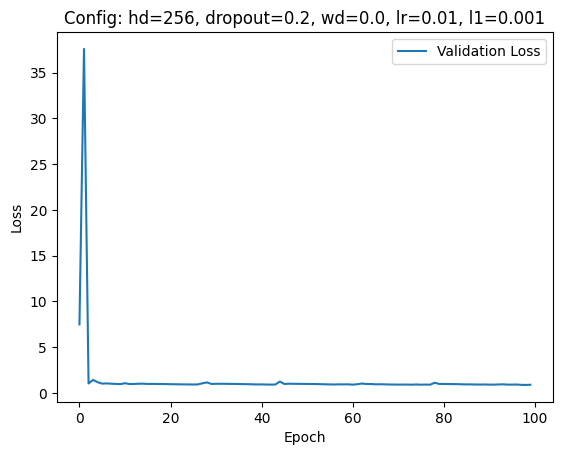

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0274


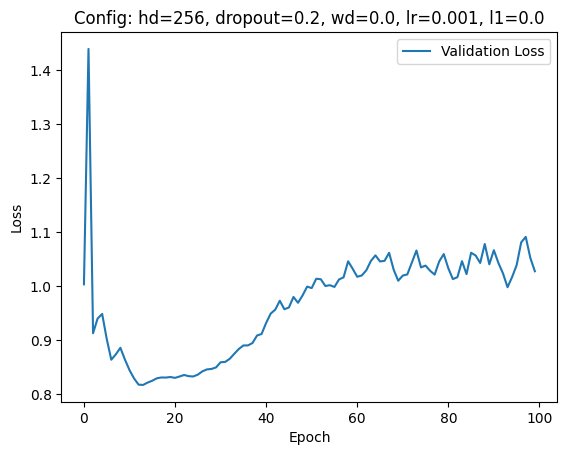

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0324


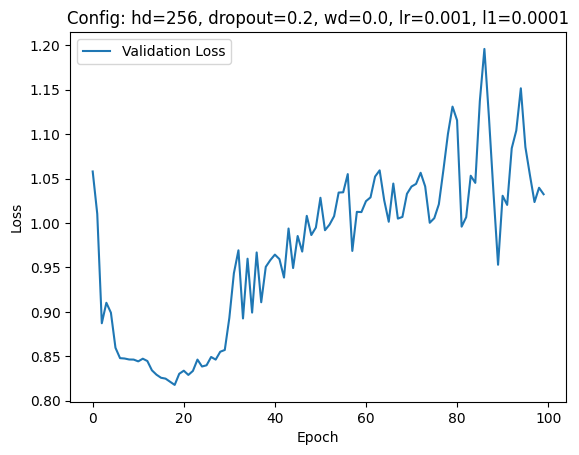

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8229


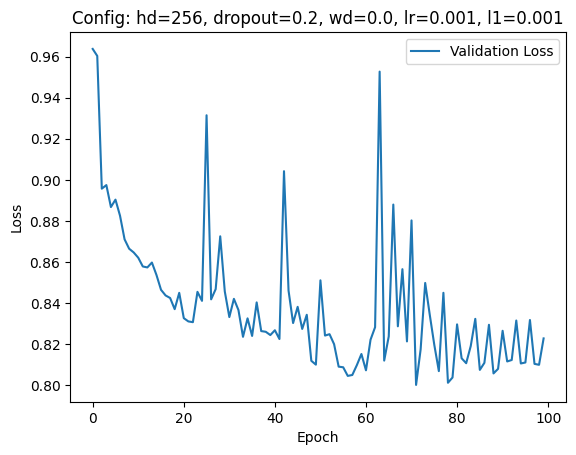

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0038


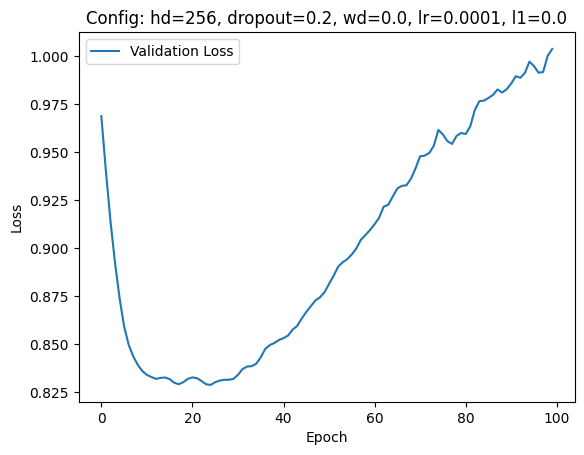

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9504


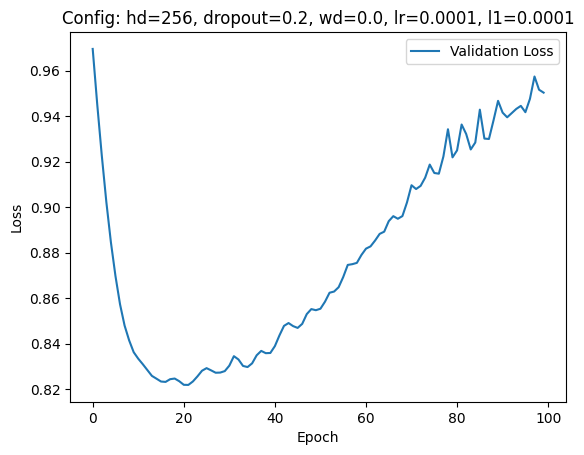

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8272


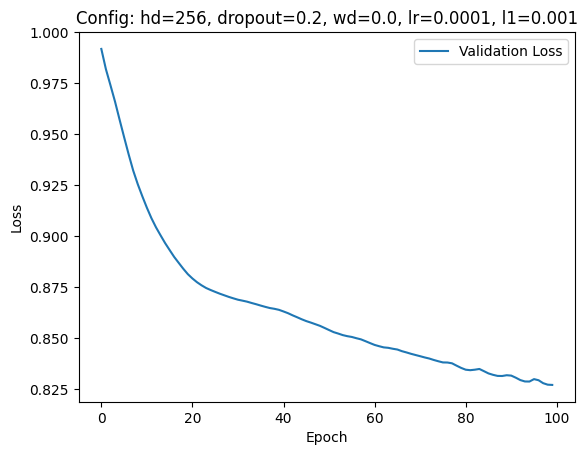

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8783


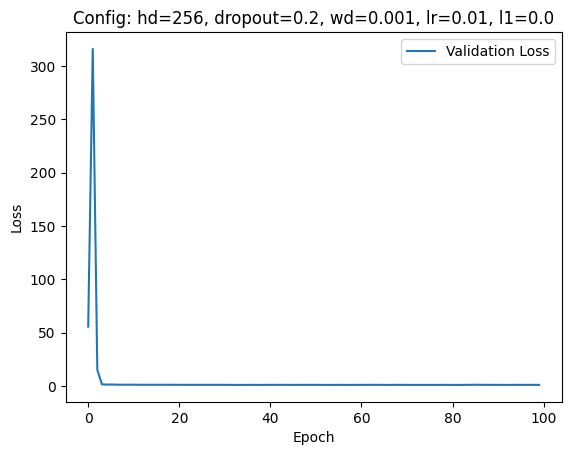

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0004


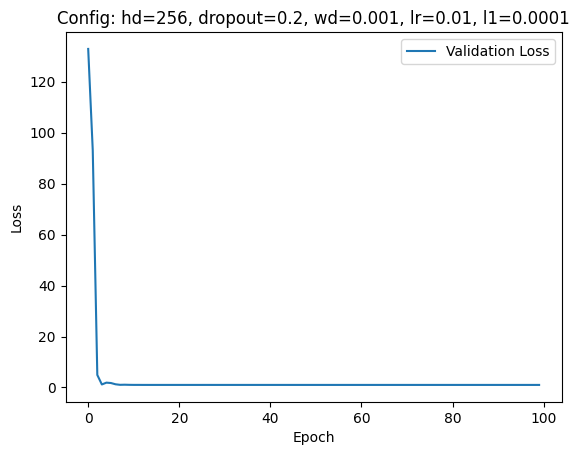

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8948


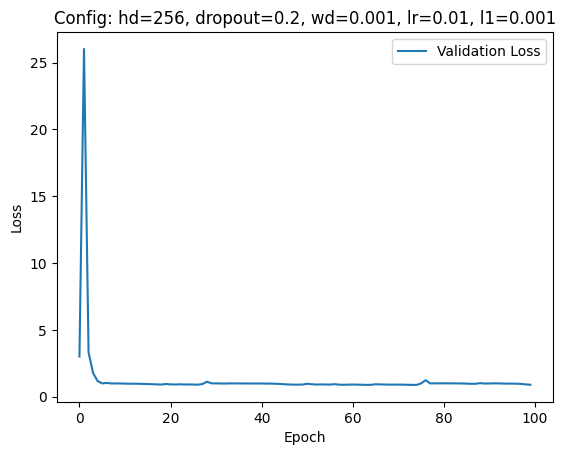

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0608


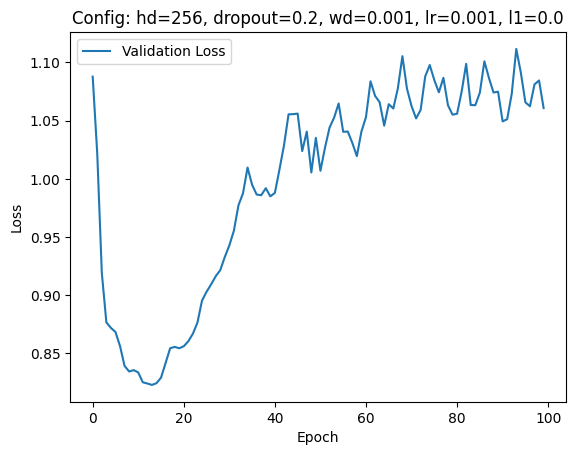

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0443


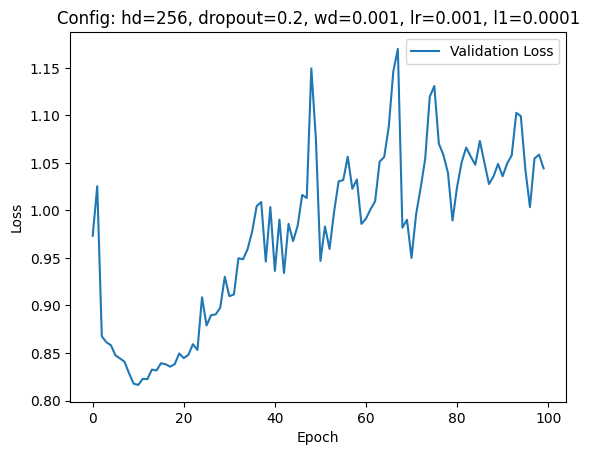

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8220


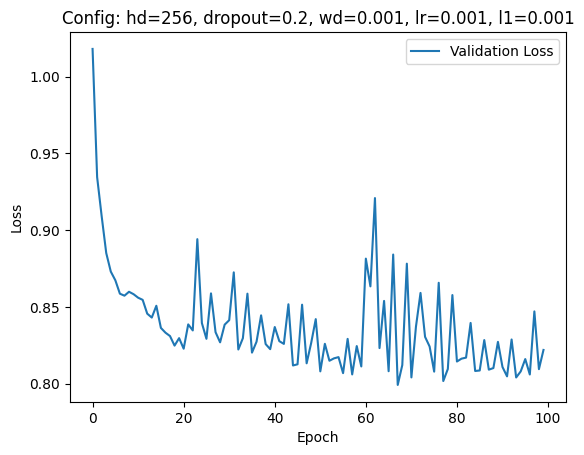

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0132


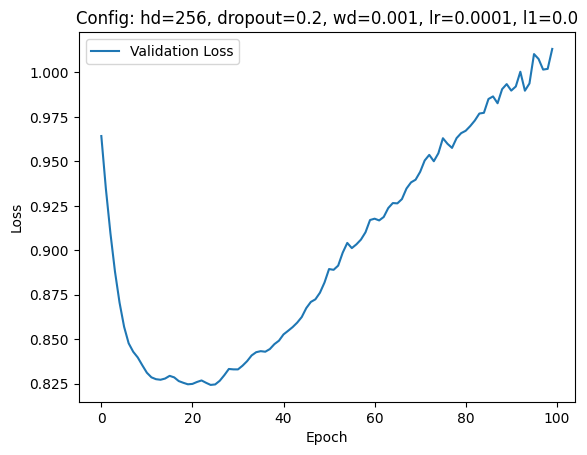

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9571


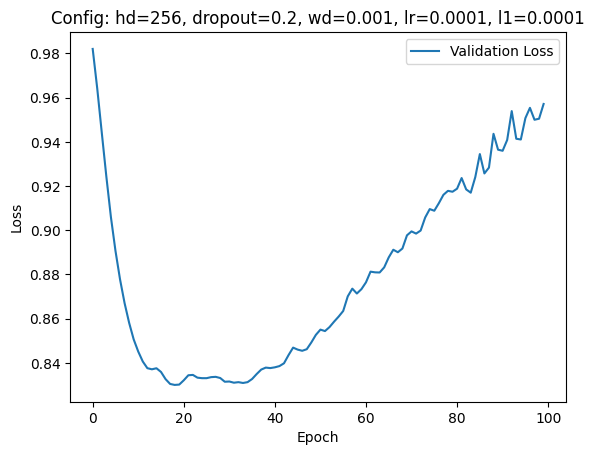

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8307


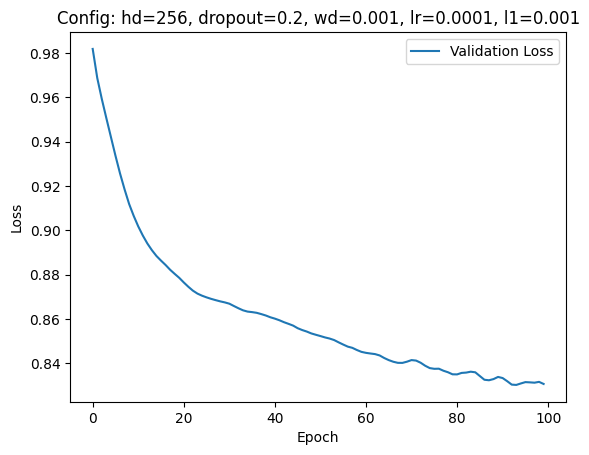

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8681


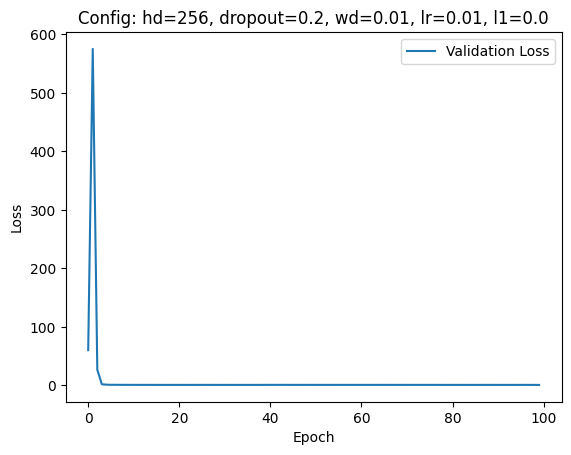

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9890


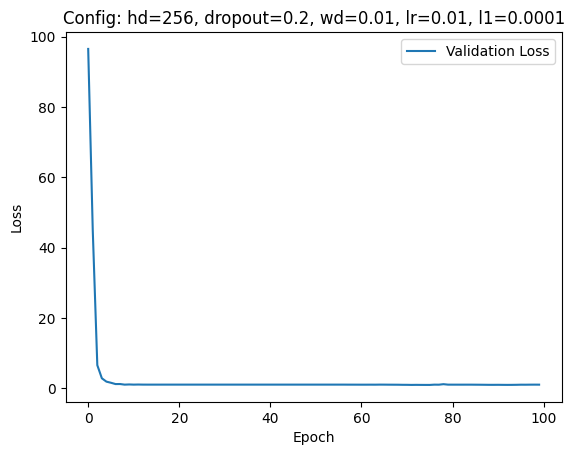

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9247


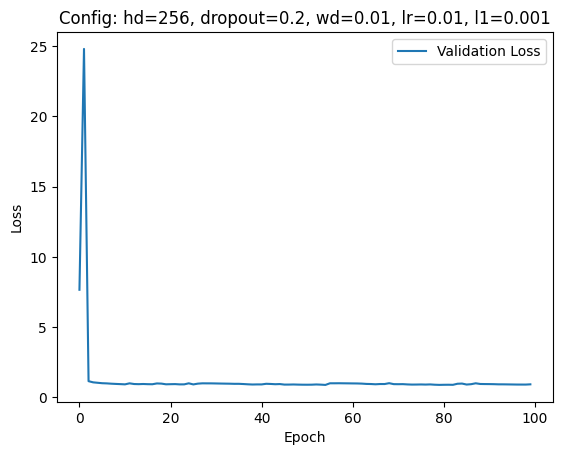

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0147


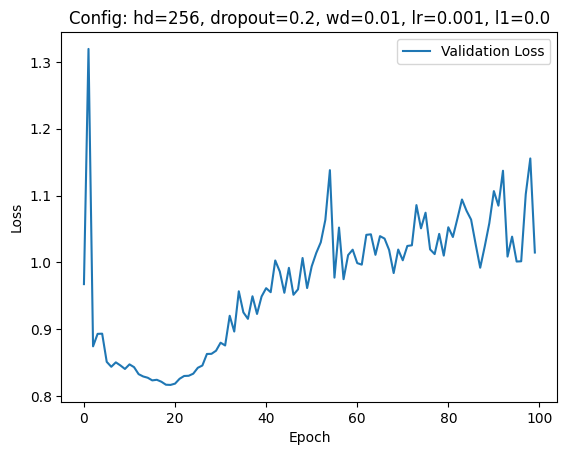

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0442


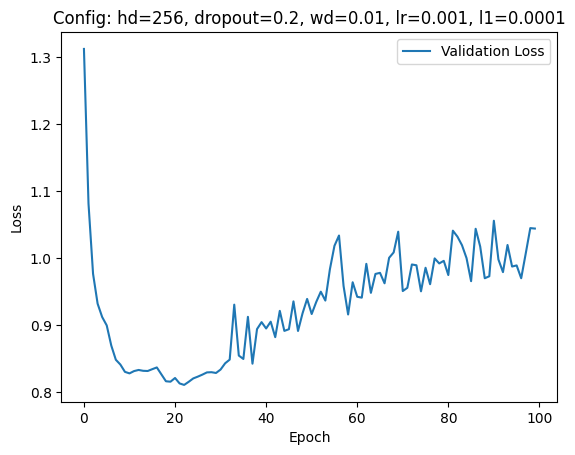

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8133


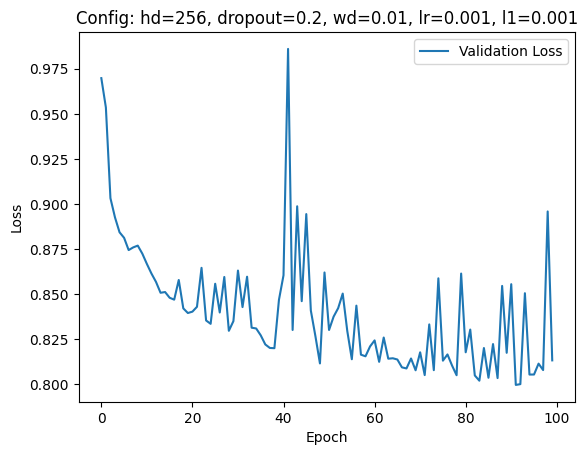

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9693


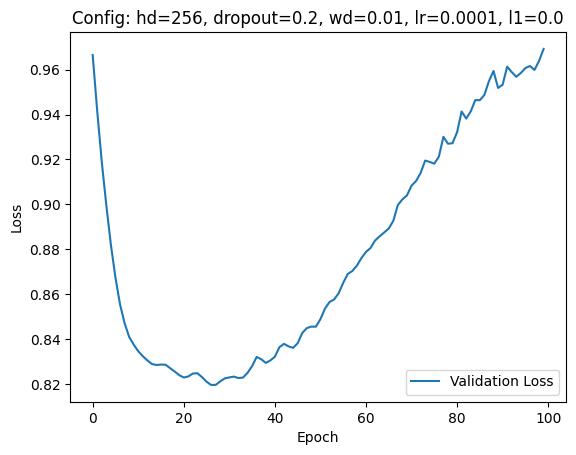

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9200


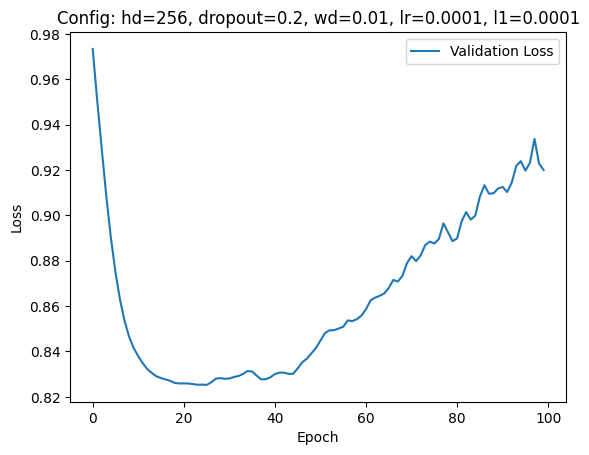

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.2, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.2, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8222


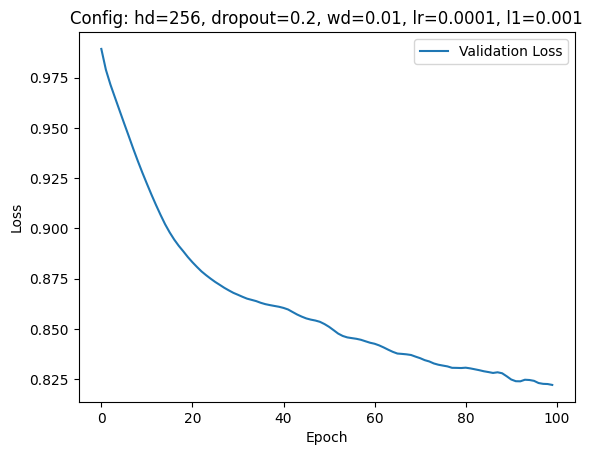

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0013


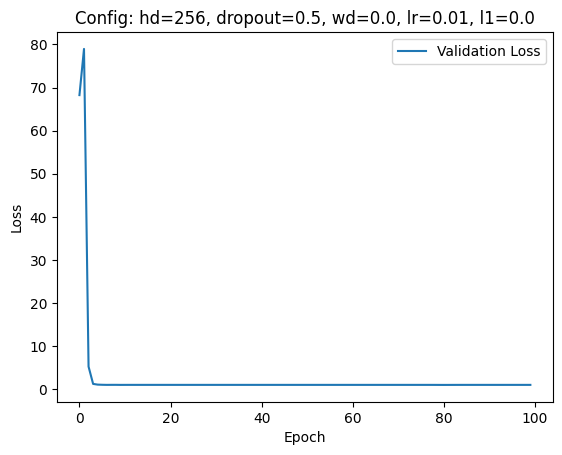

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9641


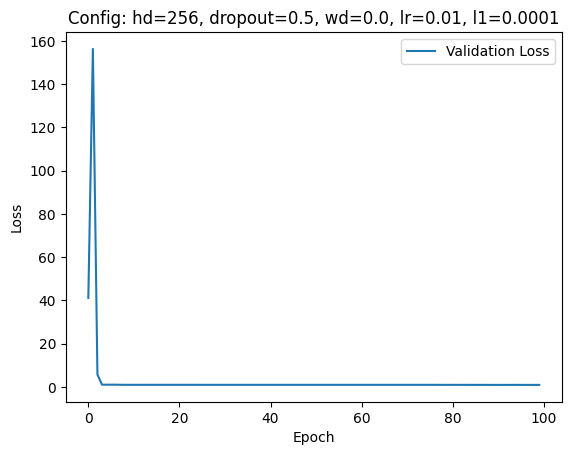

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9448


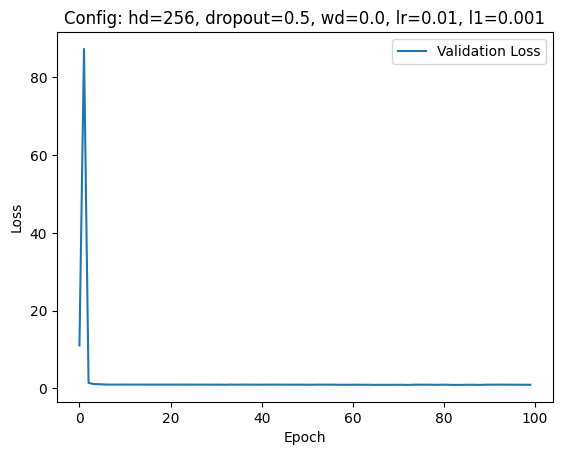

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9674


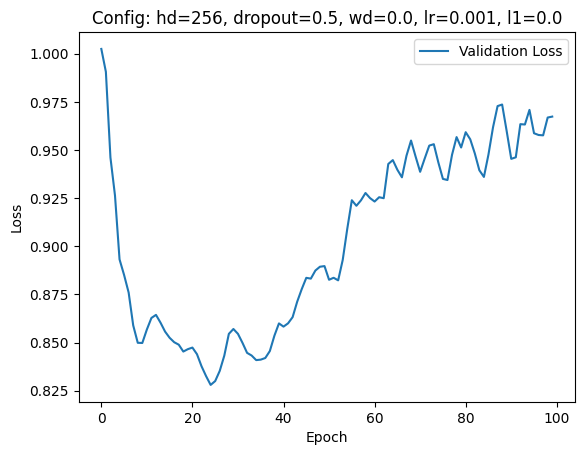

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9309


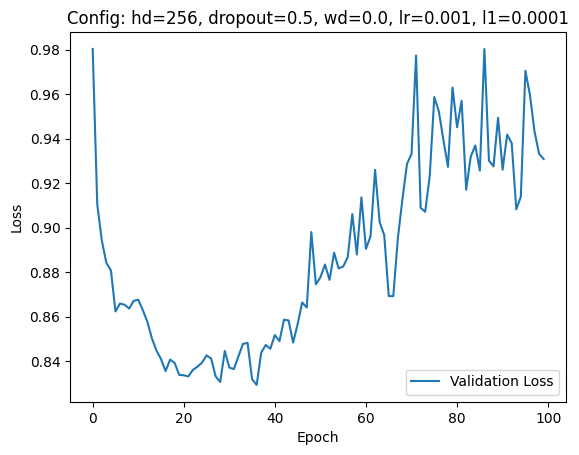

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8097


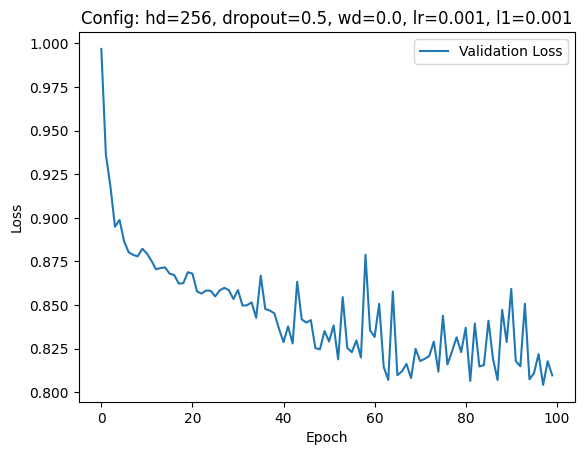

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8647


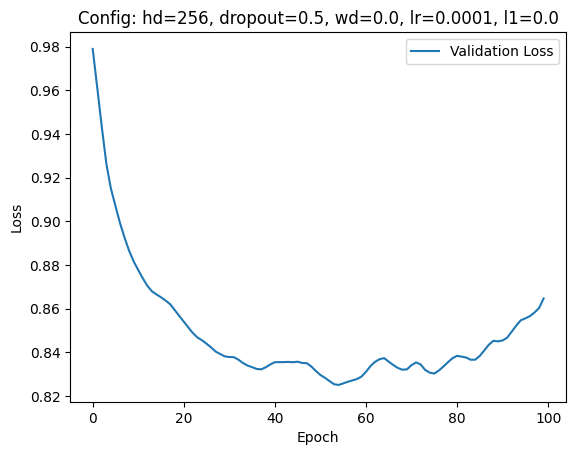

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8725


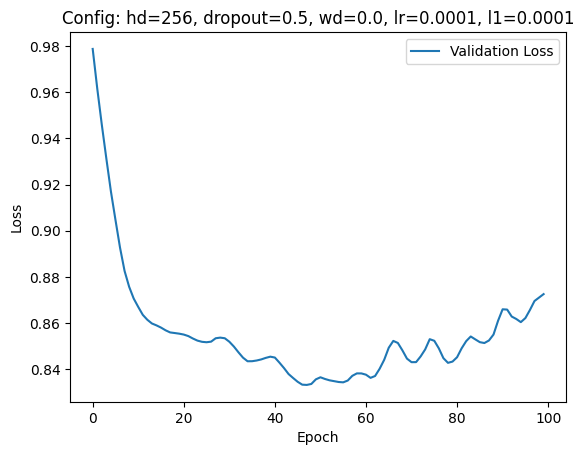

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.0, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.0, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8419


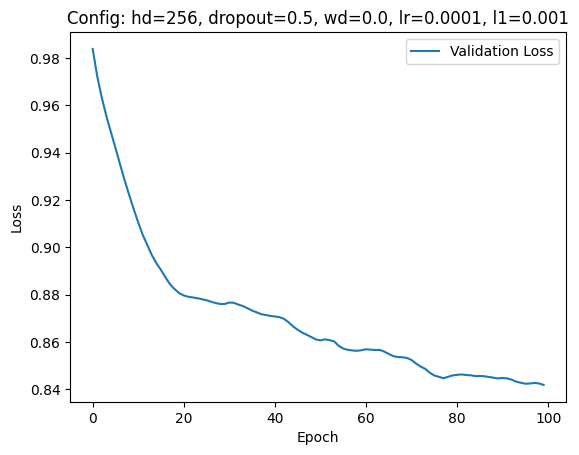

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9631


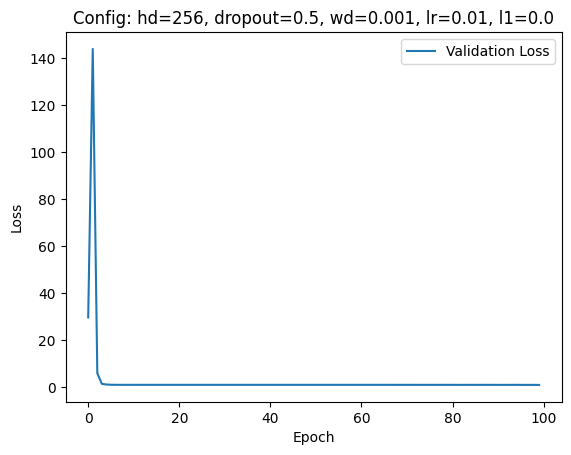

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0000


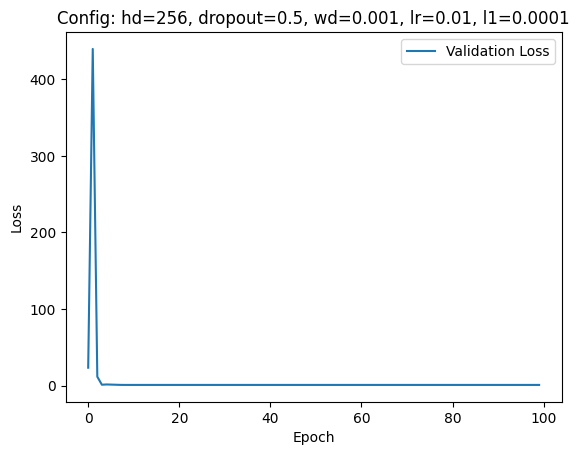

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0001


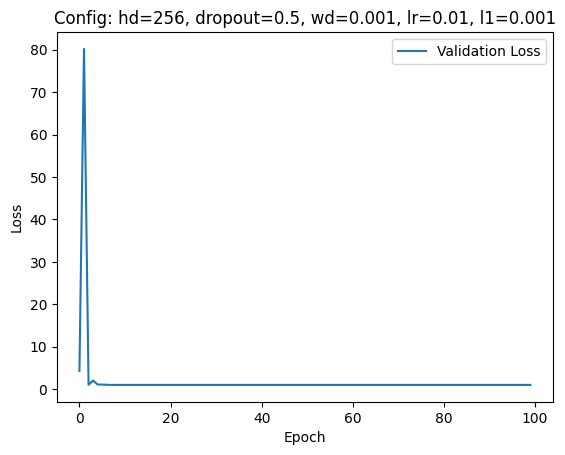

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9626


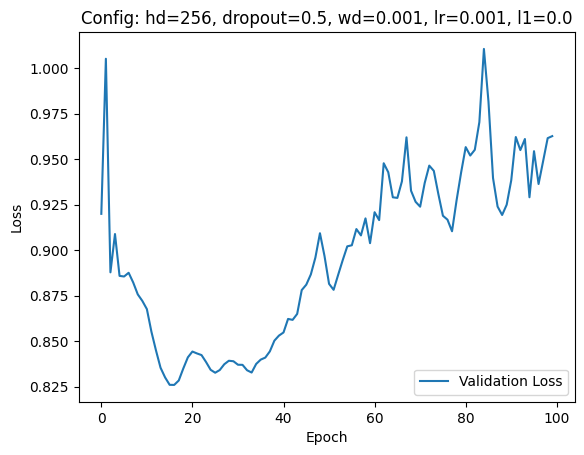

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9474


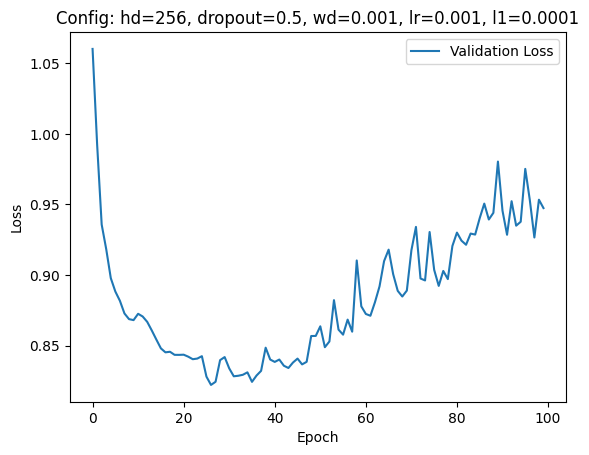

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8313


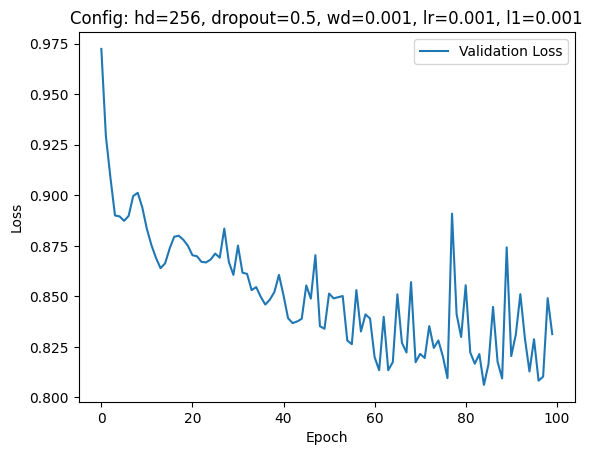

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8652


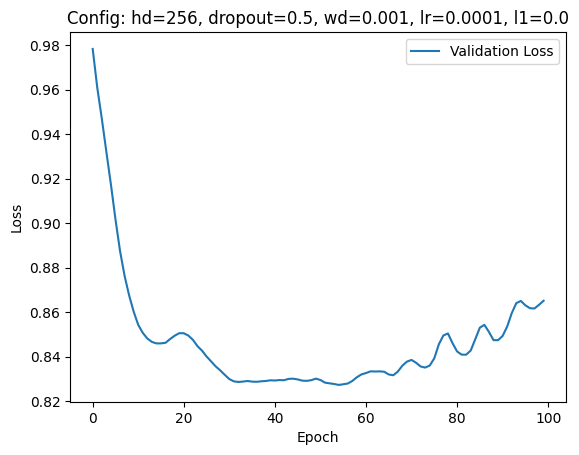

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8699


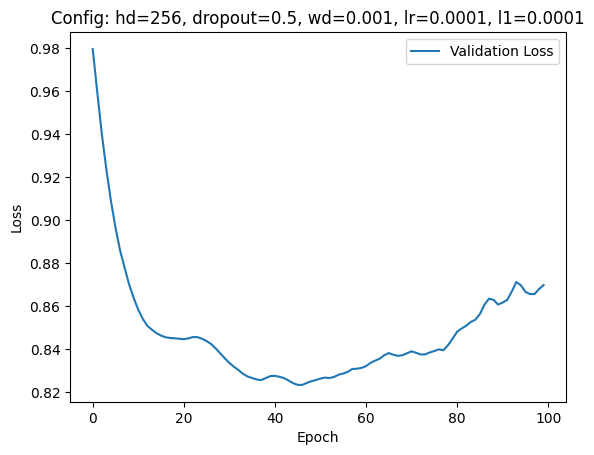

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.001, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.001, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8355


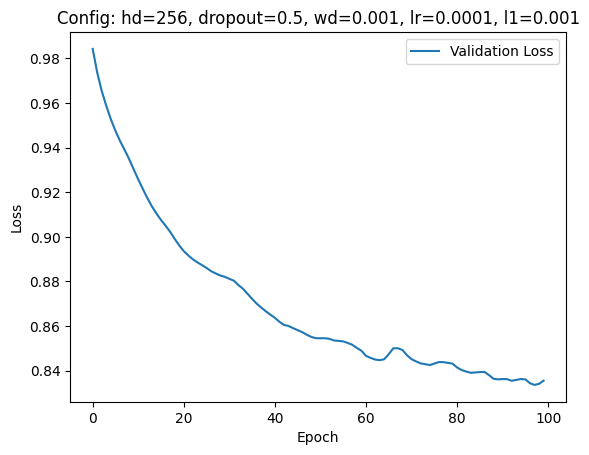

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 1.0006


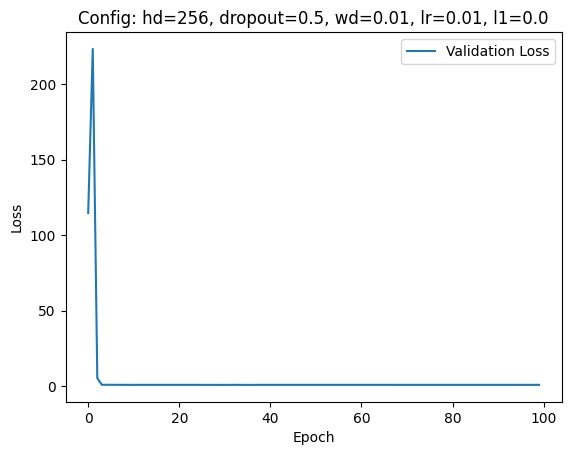

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9491


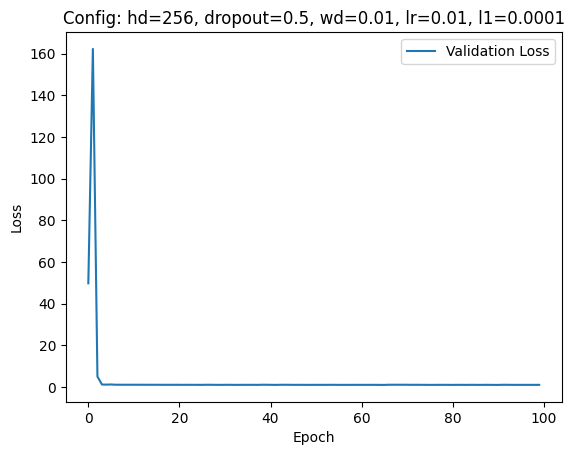

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.01, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9394


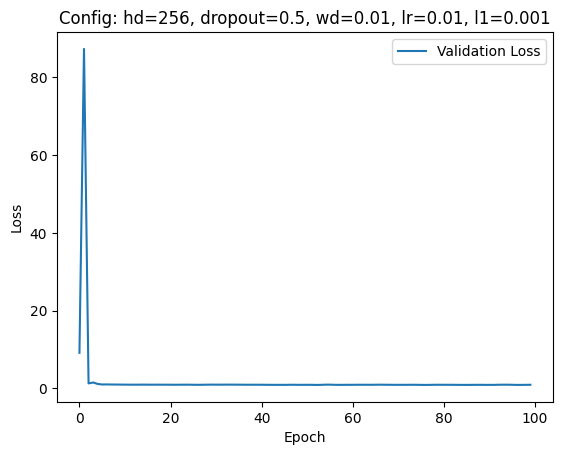

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9878


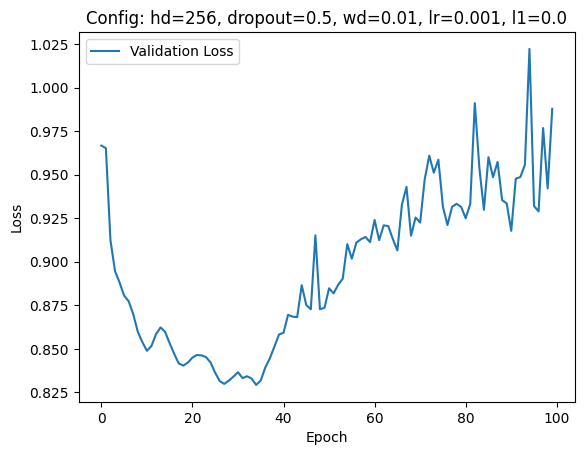

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.9260


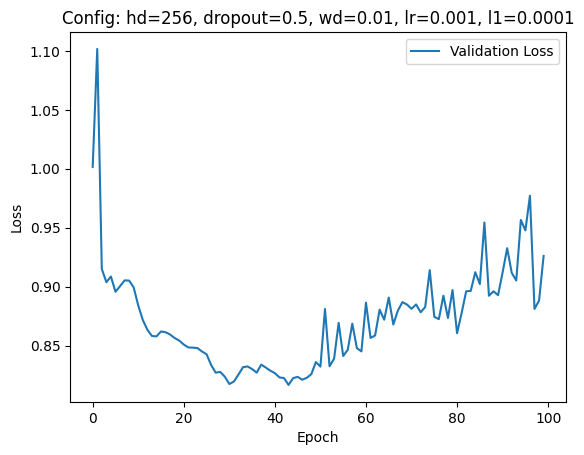

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8279


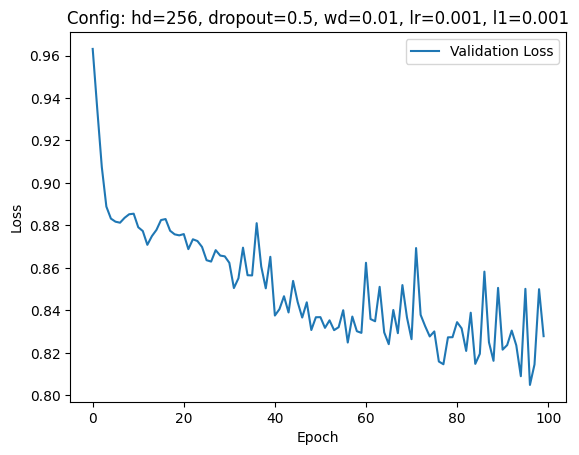

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8767


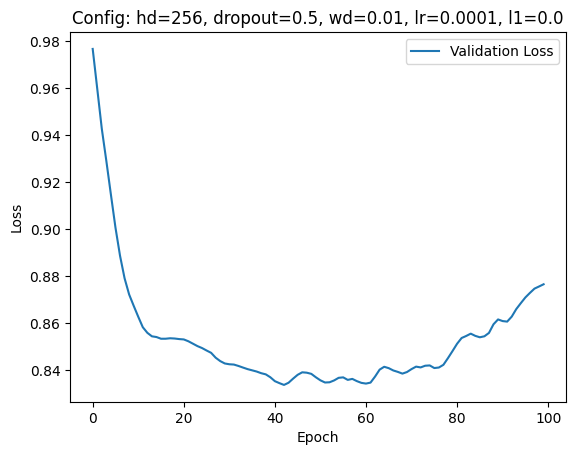

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.0001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.0001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8613


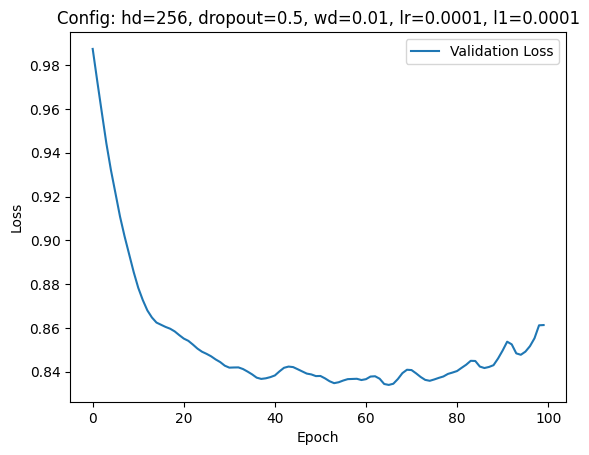

INFO:models.ffnn:Grid search: hidden_dim=256, dropout=0.5, weight_decay=0.01, lr=0.0001, l1=0.001
INFO:models.ffnn:FFNN built with input_dim=6912, hidden_dim=256, dropout=0.5, weight_decay=0.01, l1=0.001
INFO:models.ffnn:Loaded best model state based on validation loss.
INFO:models.ffnn:Final validation loss for configuration: 0.8557


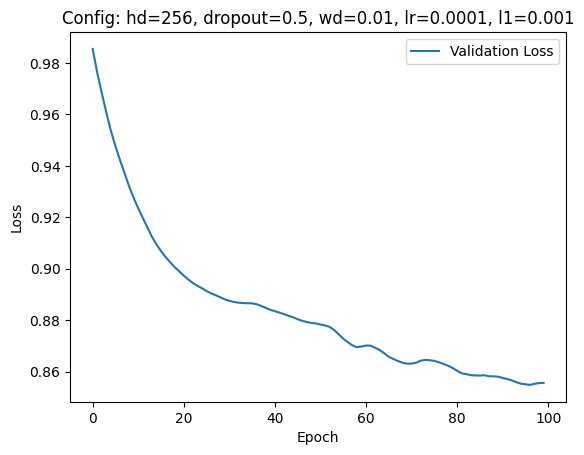

Best Hyperparameters: {'hidden_dim': 256, 'dropout': 0.0, 'weight_decay': 0.0, 'lr': 0.01, 'l1': 0.001}


In [7]:
dummy_model = FFNNModel(input_dim)
best_model, best_params, train_losses, valid_losses = dummy_model.grid_search(
    train_data=(X_train.cpu().numpy(), y_train),
    valid_data=(X_valid.cpu().numpy(), y_valid),
    grid_params=grid_params,
    epochs=epochs,
    device=device
)

print("Best Hyperparameters:", best_params)

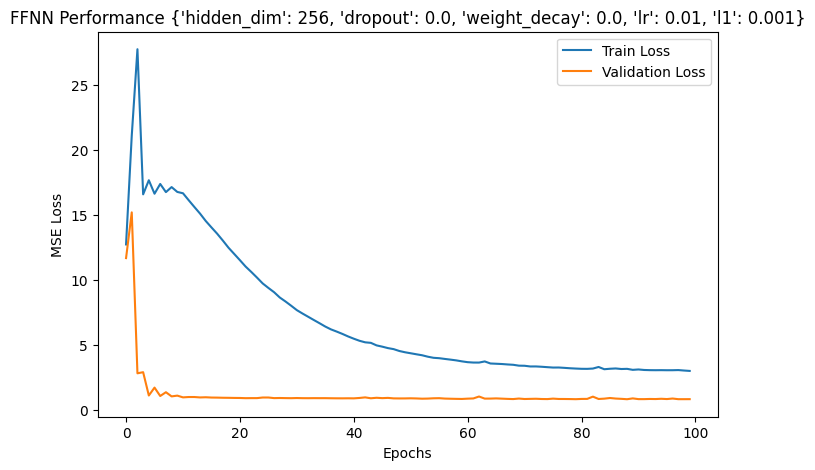

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title(f"FFNN Performance {best_params}")
plt.legend()
plt.savefig("plots/benchmark_2/ffnn_grid_search.pdf")
plt.show()

In [ ]:
test_preds = best_model.evaluate(test_data=(X_test.cpu().numpy(), y_test), device=device)

In [10]:
mse, mae, r2, nll, crps = evaluate_model(y_test, test_preds)
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, NLL: {nll:.4f}, CRPS: {crps:.4f}")

MSE: 0.8715, MAE: 0.7583, R2: 0.1285, NLL: 1.3502, CRPS: 0.7583


In [11]:
best_model.save(save_path)

INFO:models.ffnn:Model saved to baseline_weights/benchmark_2/ffnn.pth
